### IMPORTING LIBRARIES

In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

### DATA PREPROCESSING

In [2]:
#df = pd.read_csv("/content/drive/MyDrive/Data Science Group 1/Cancer_Data.csv")
df = pd.read_csv("Cancer_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

- The dataset consists of 569 observations and 32 variables.
- It has only one categorical variable
- Variable 'Unnamed: 32' is empty, but other variables have no missing values

##### HANDLING OUTLIERS AND SKEWNESS

In [5]:
outlier_columns = []
for i in df.select_dtypes(include=[np.number]):
    x = df[i]
    if ((x.mean() + 3*x.std()) < max(x)) or ((x.mean() - 3*x.std()) > min(x)):
        outlier_columns.append(str(i))
        print(f"Column '{i}' may have potential outliers")
    else:
        print(f"Column '{i}' may not have outliers")

Column 'id' may have potential outliers
Column 'radius_mean' may have potential outliers
Column 'texture_mean' may have potential outliers
Column 'perimeter_mean' may have potential outliers
Column 'area_mean' may have potential outliers
Column 'smoothness_mean' may have potential outliers
Column 'compactness_mean' may have potential outliers
Column 'concavity_mean' may have potential outliers
Column 'concave points_mean' may have potential outliers
Column 'symmetry_mean' may have potential outliers
Column 'fractal_dimension_mean' may have potential outliers
Column 'radius_se' may have potential outliers
Column 'texture_se' may have potential outliers
Column 'perimeter_se' may have potential outliers
Column 'area_se' may have potential outliers
Column 'smoothness_se' may have potential outliers
Column 'compactness_se' may have potential outliers
Column 'concavity_se' may have potential outliers
Column 'concave points_se' may have potential outliers
Column 'symmetry_se' may have potenti

C:\Users\Mahdi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_17528\1593802134.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x=i, kind="kde", height = 5)


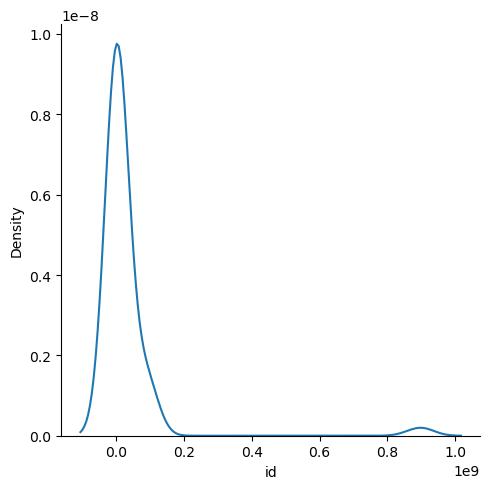

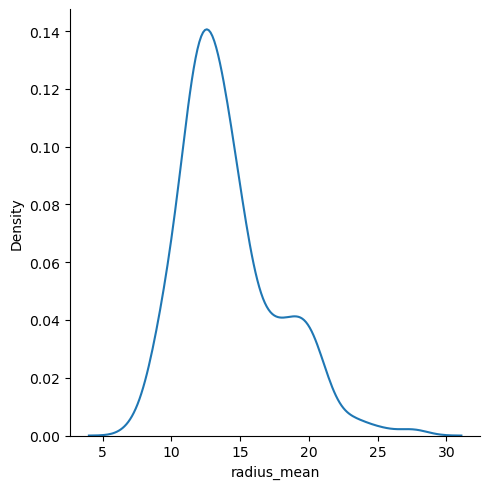

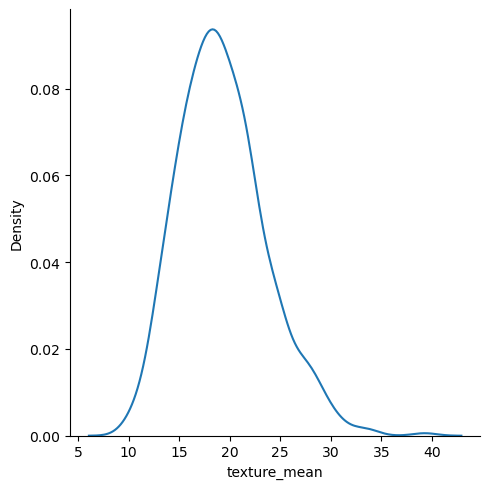

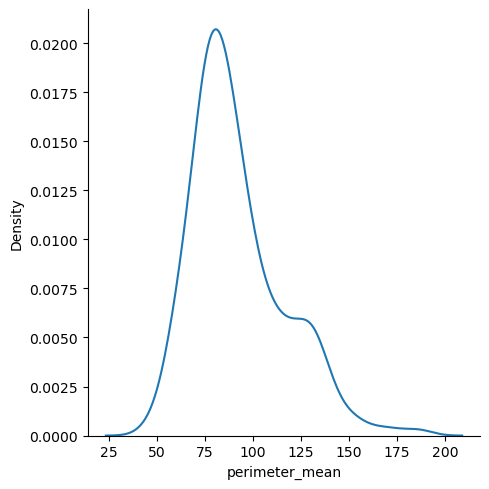

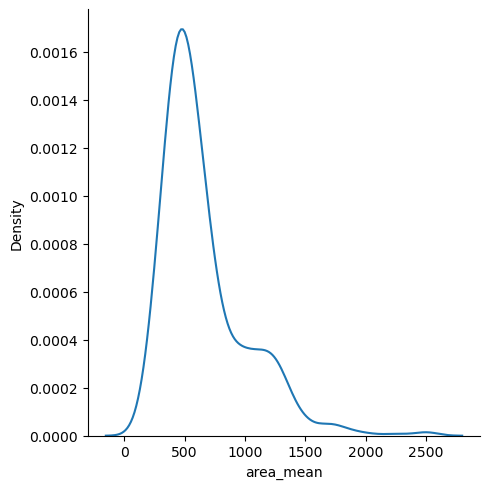

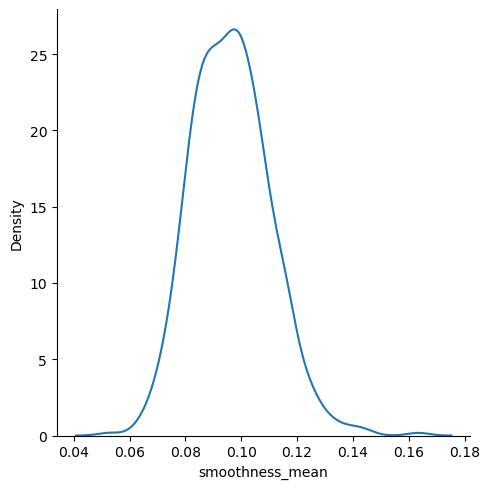

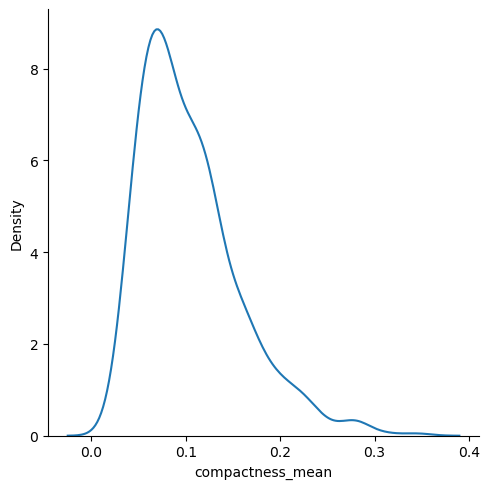

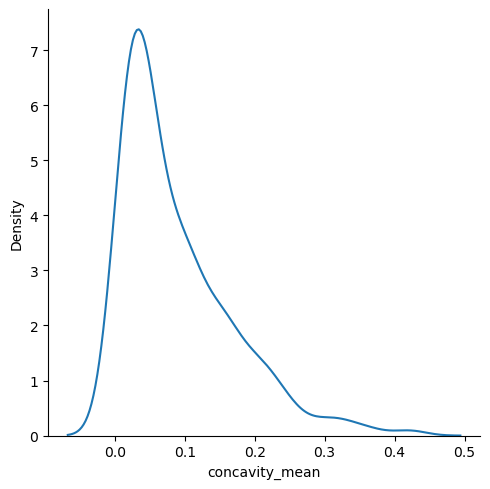

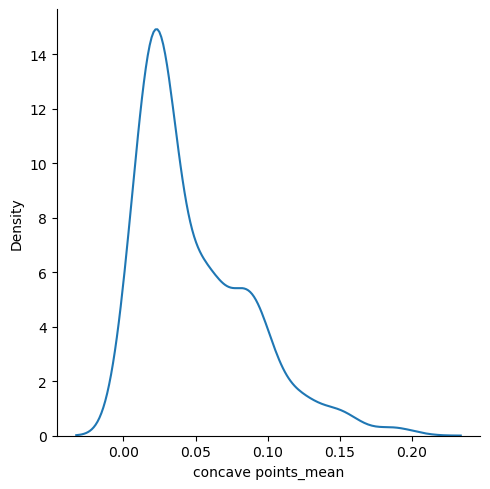

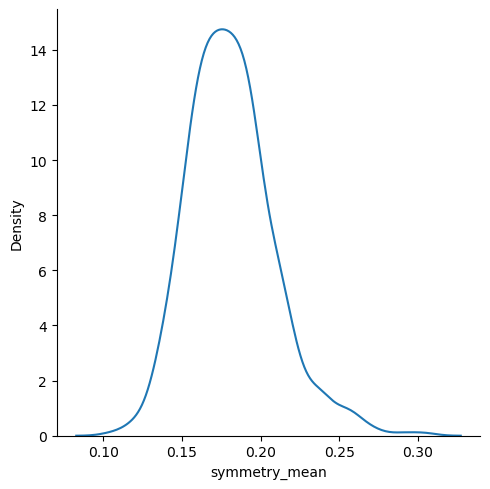

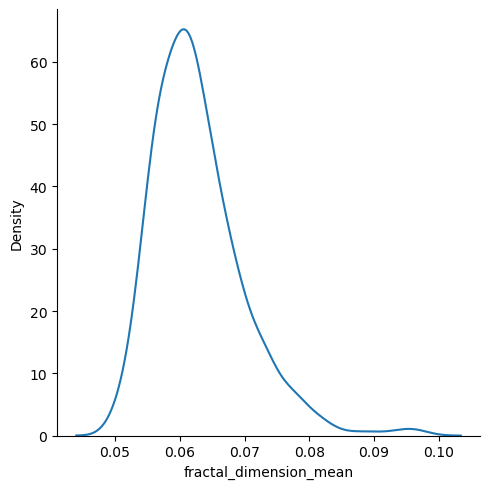

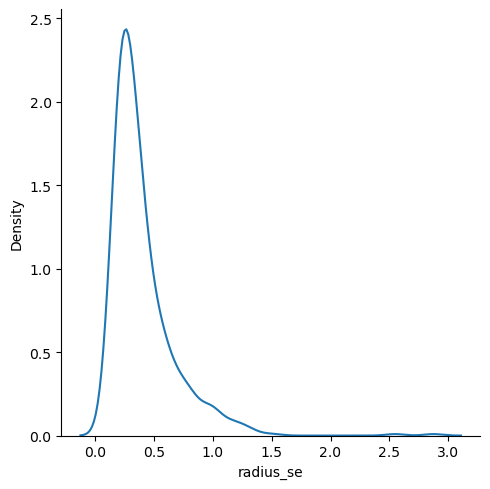

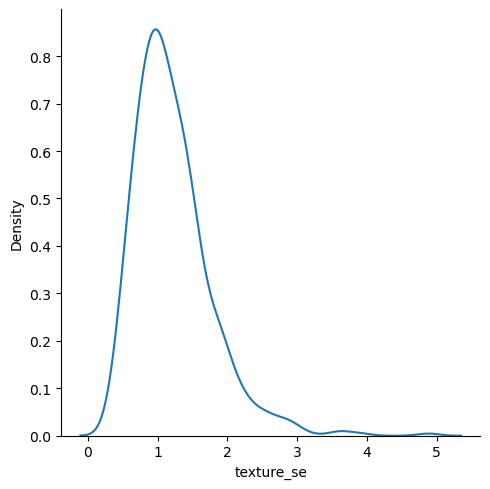

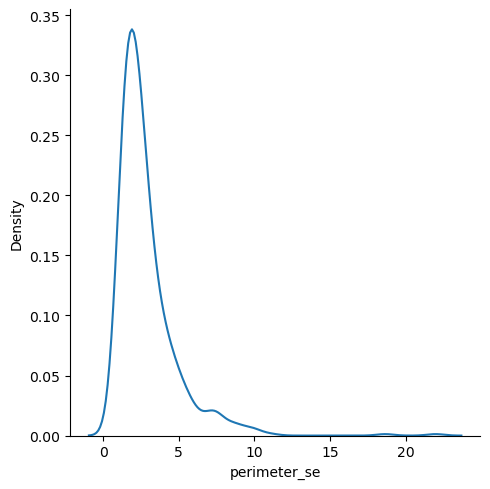

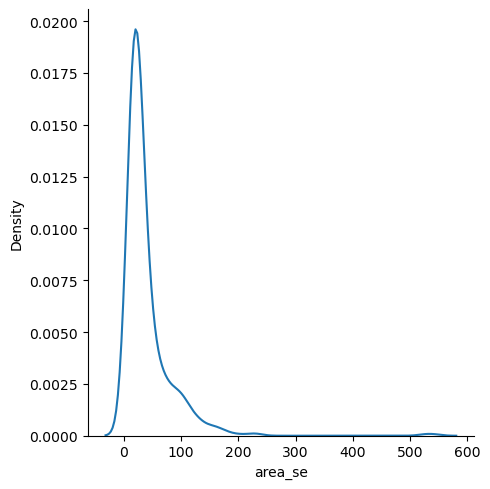

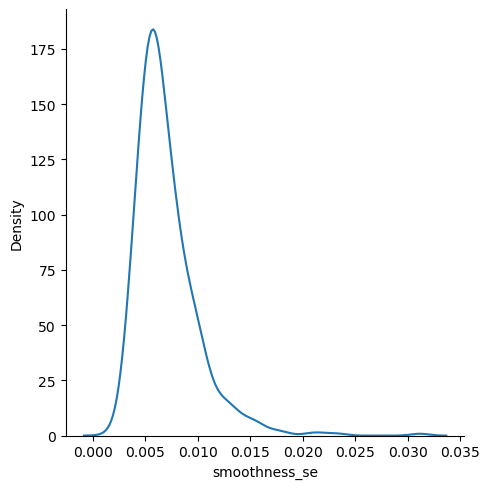

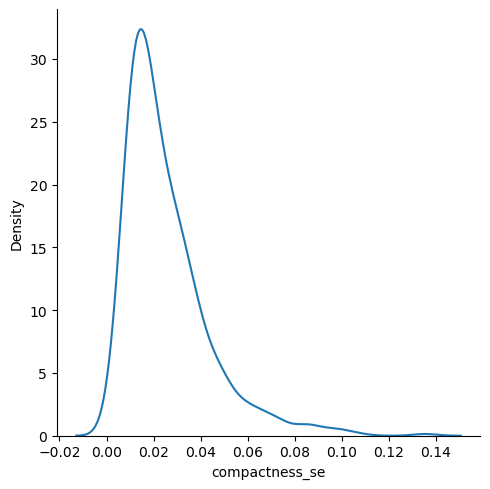

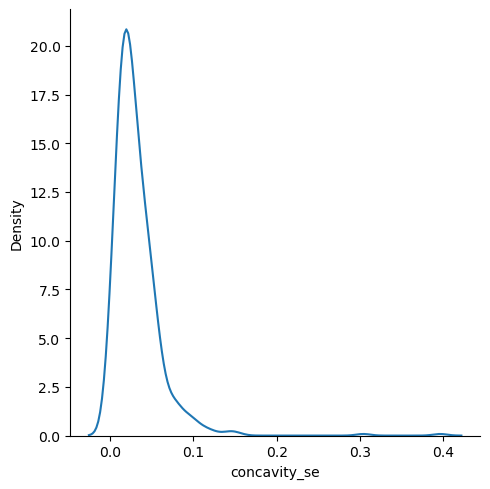

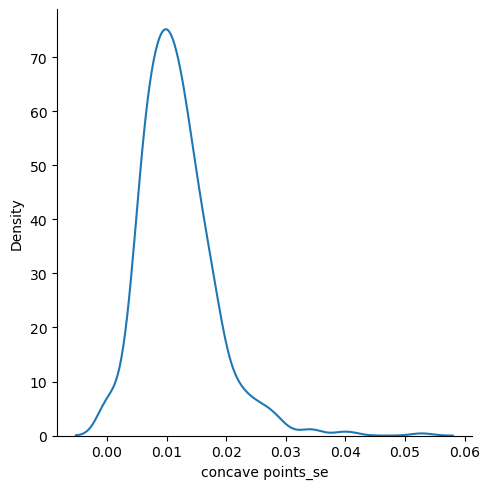

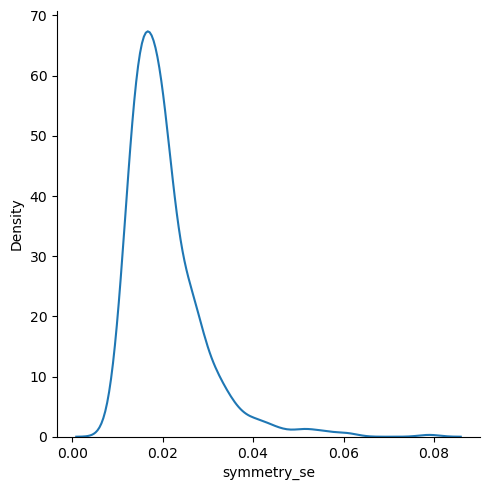

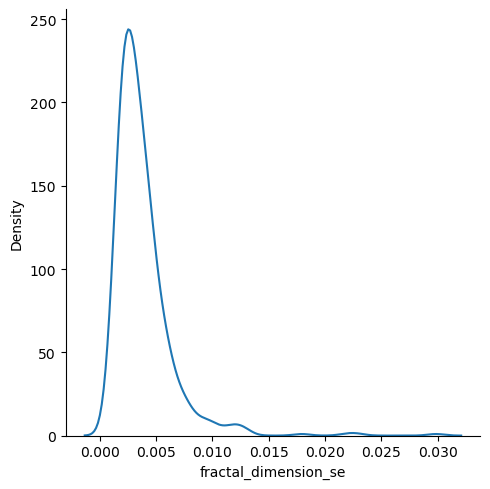

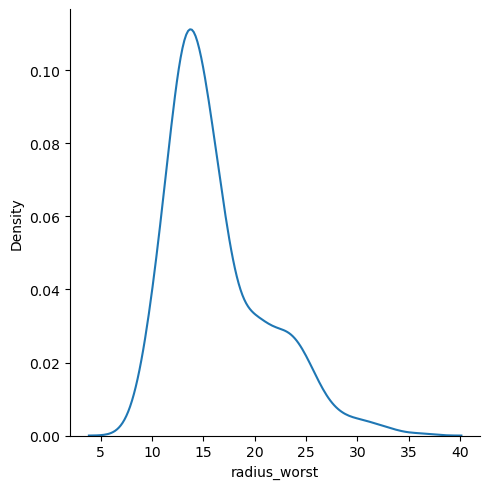

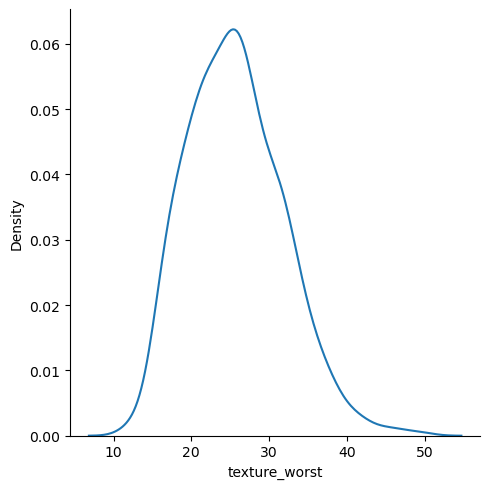

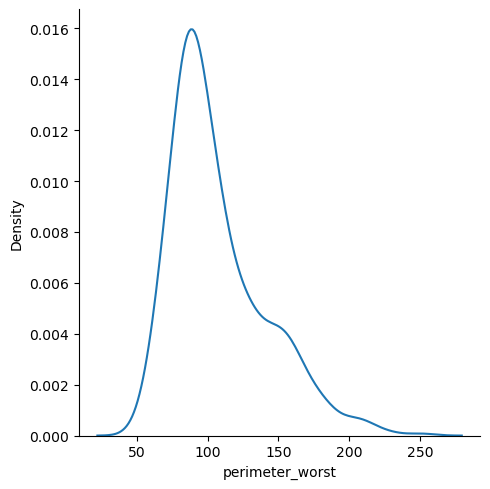

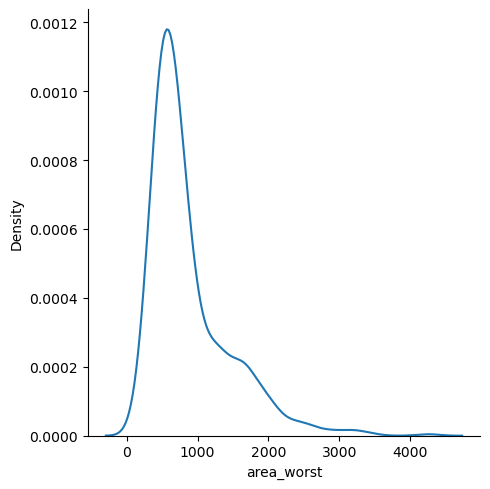

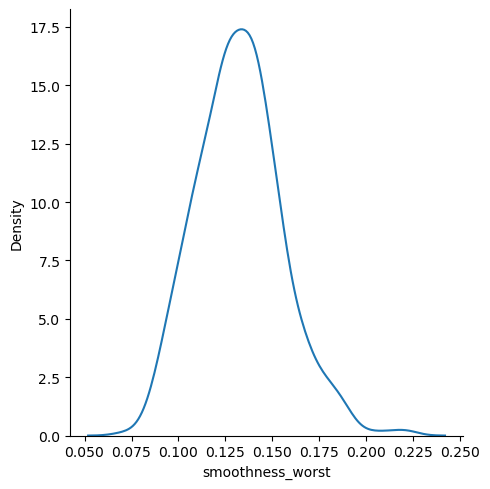

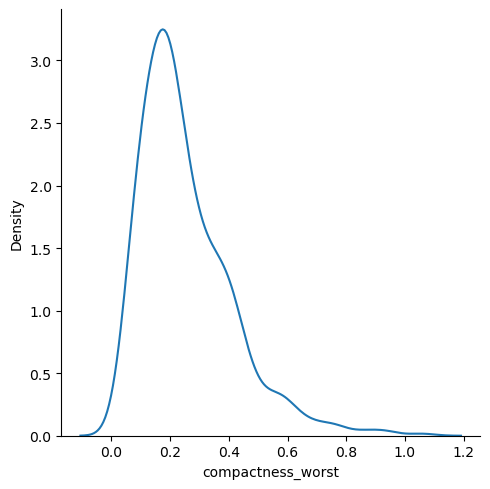

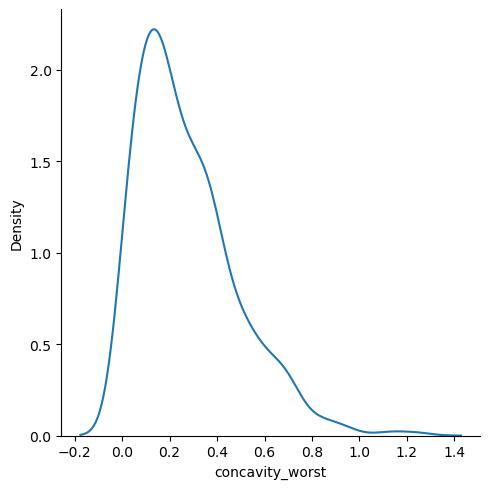

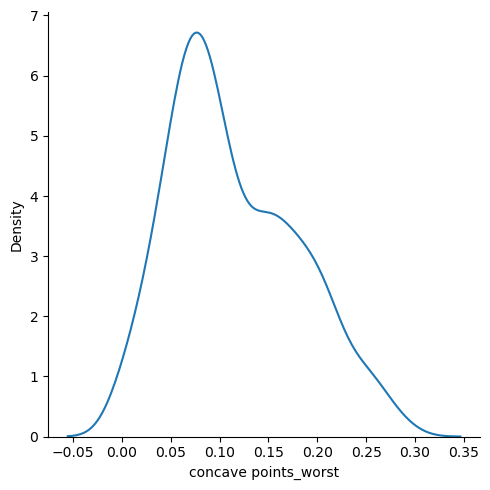

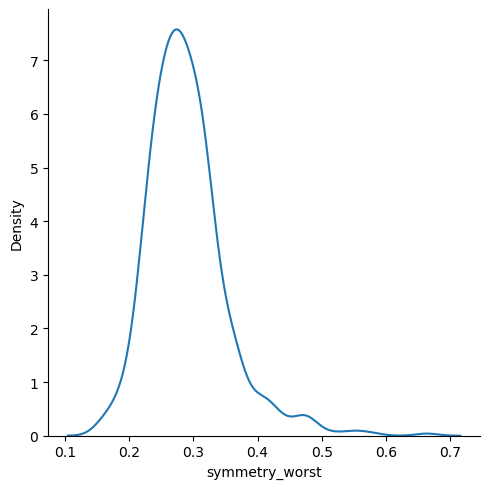

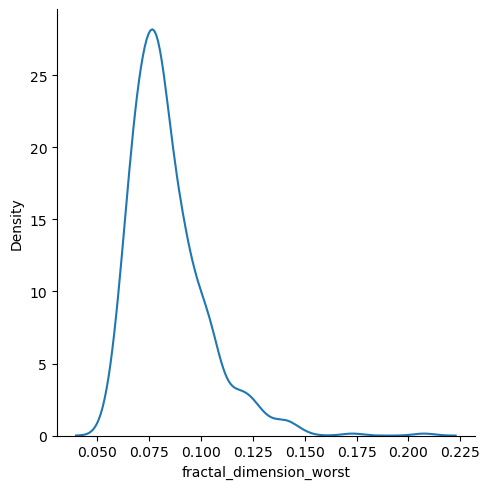

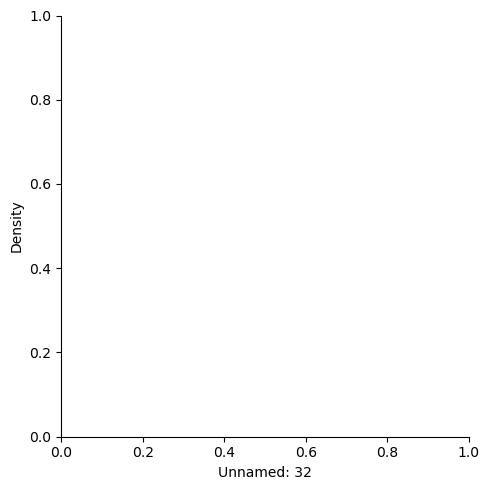

In [6]:
## PLOTTING THE DATA
for i in df.select_dtypes(include=[np.number]):
    sns.displot(data=df, x=i, kind="kde", height = 5)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_17528\2784587907.py:5: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  z_scores = stats.zscore(df[i])
C:\Users\Mahdi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_17528\2784587907.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x=i, kind="kde", height = 5)


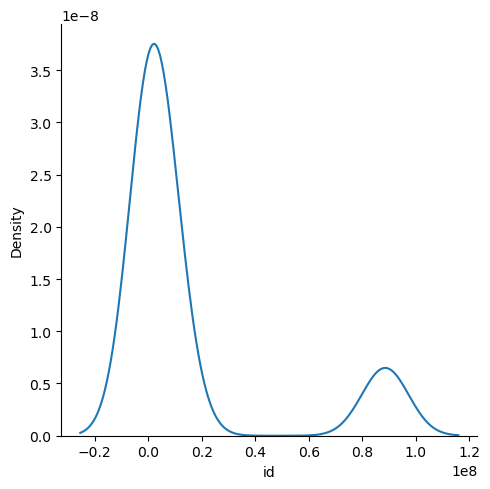

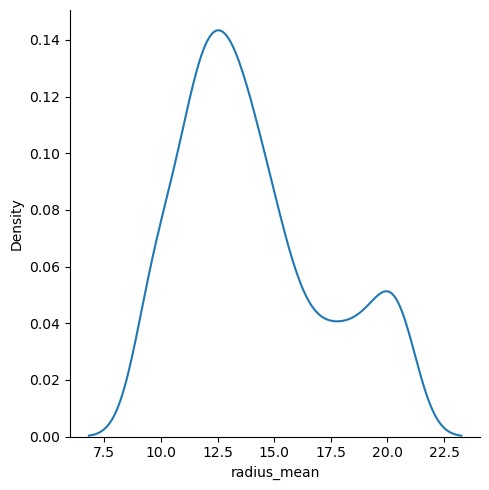

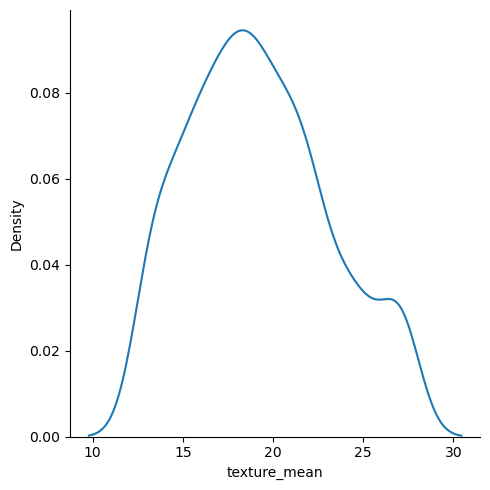

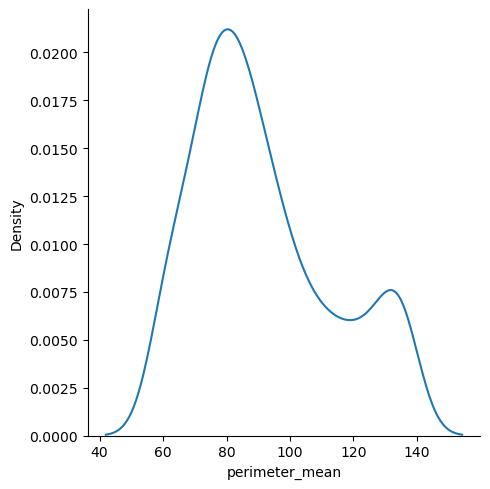

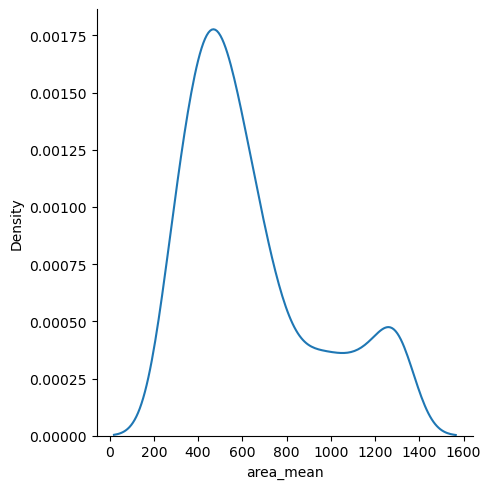

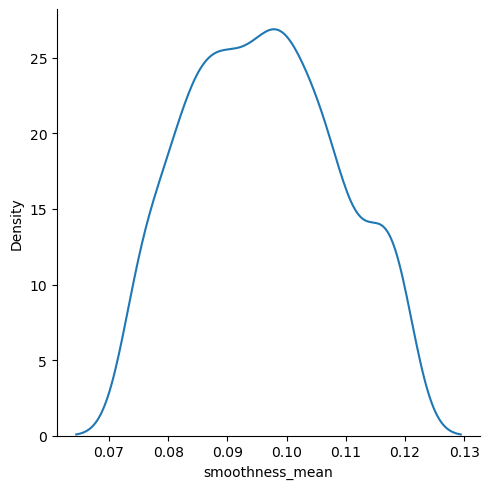

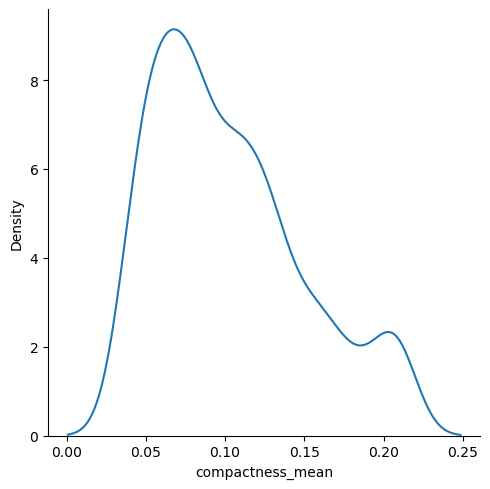

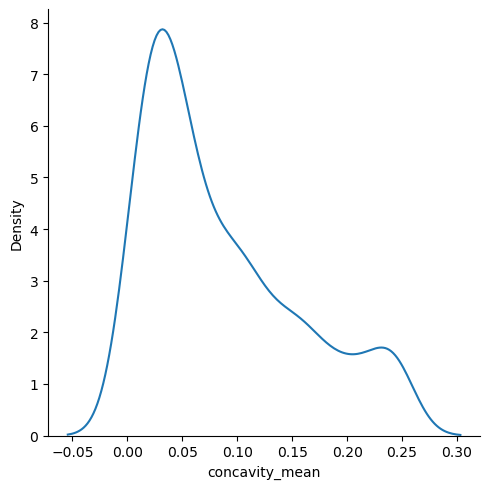

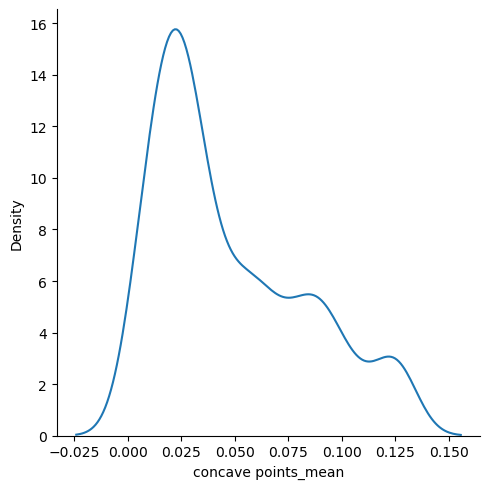

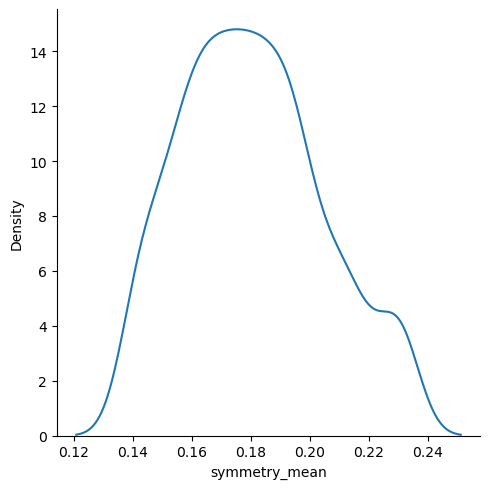

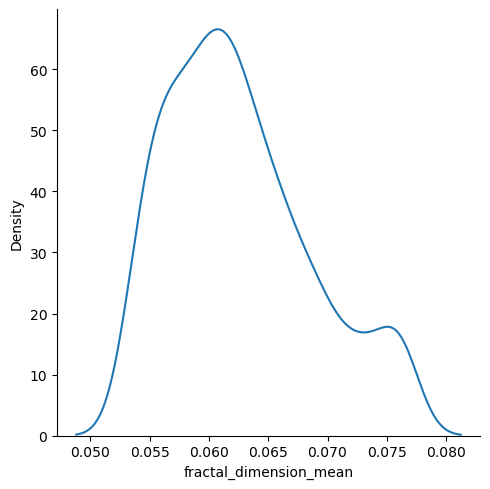

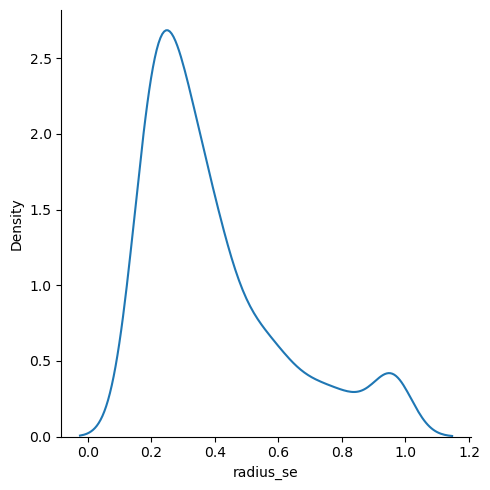

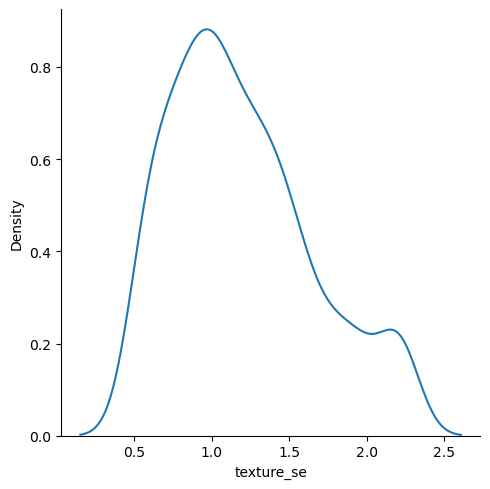

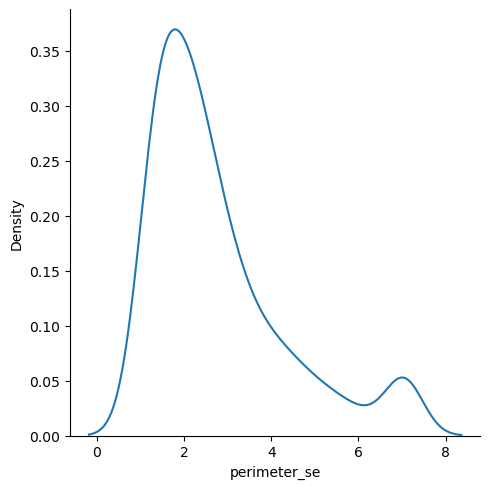

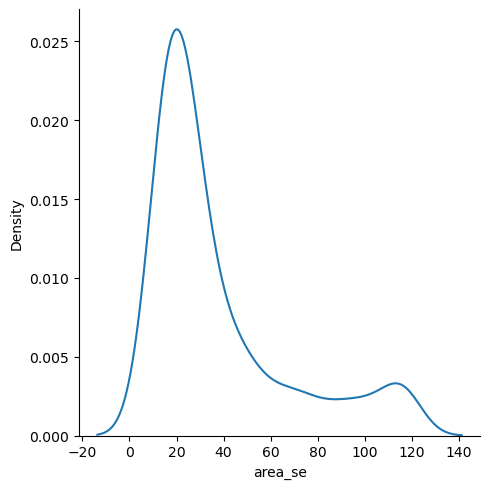

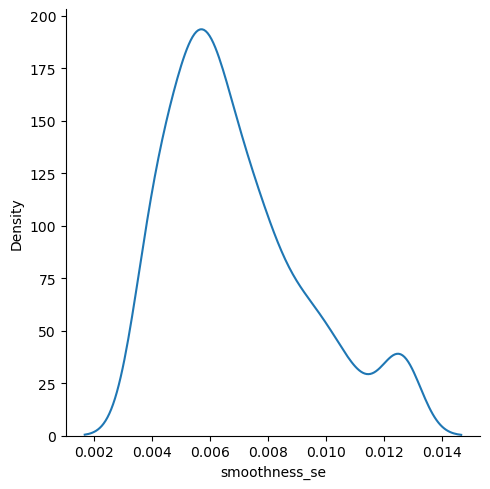

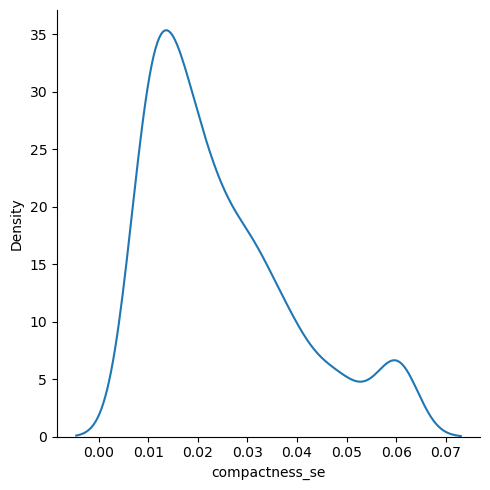

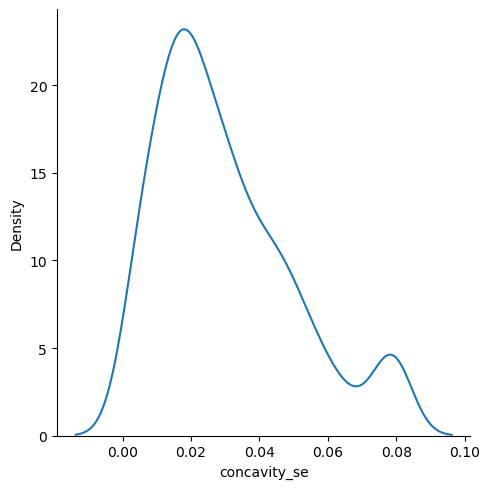

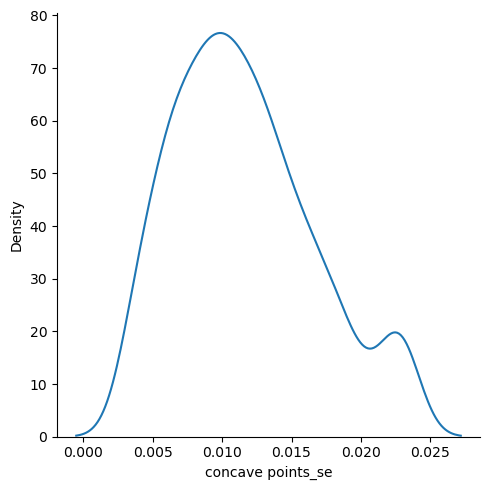

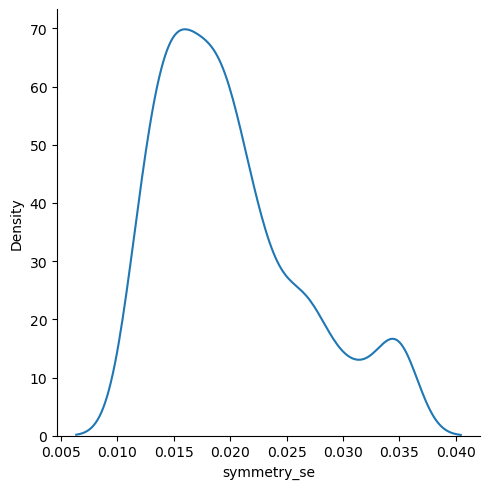

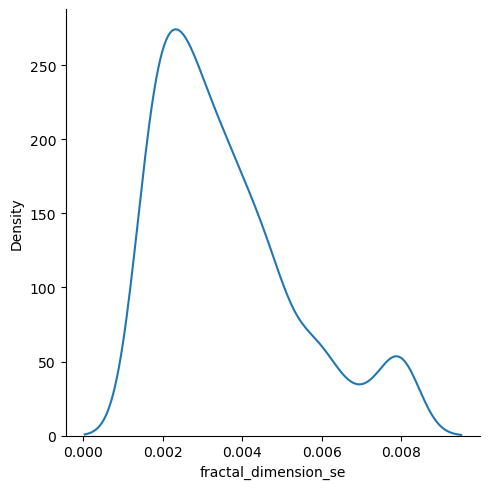

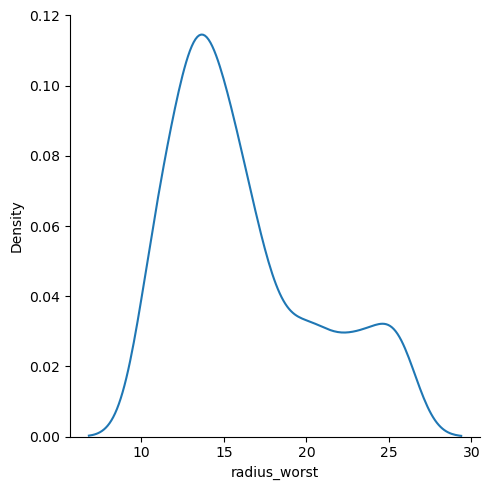

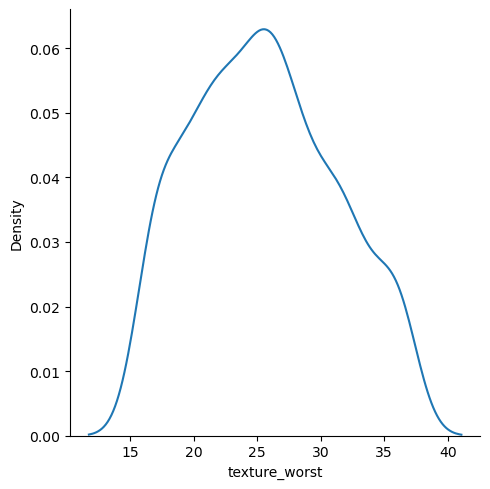

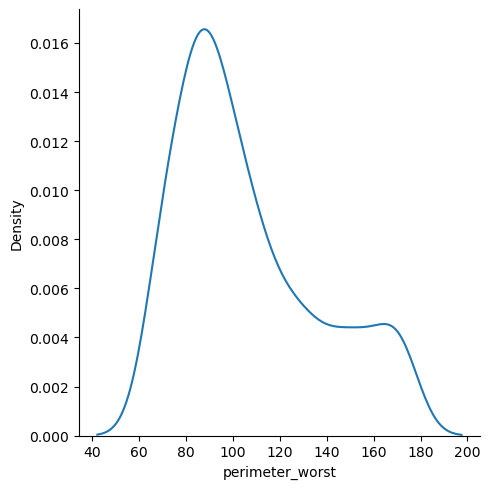

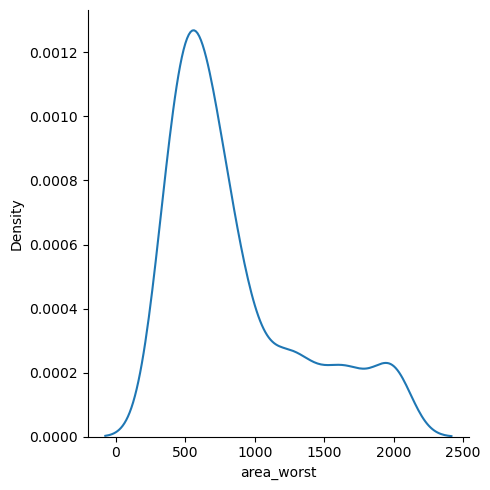

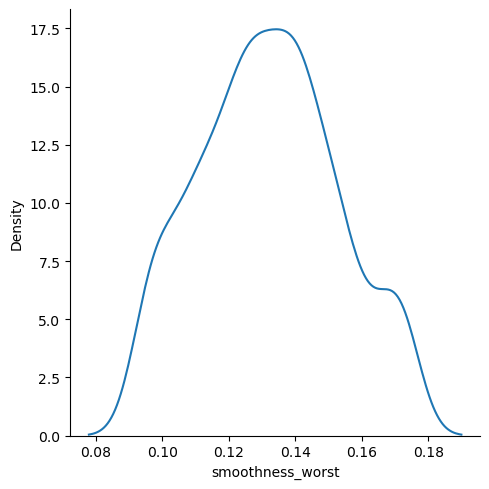

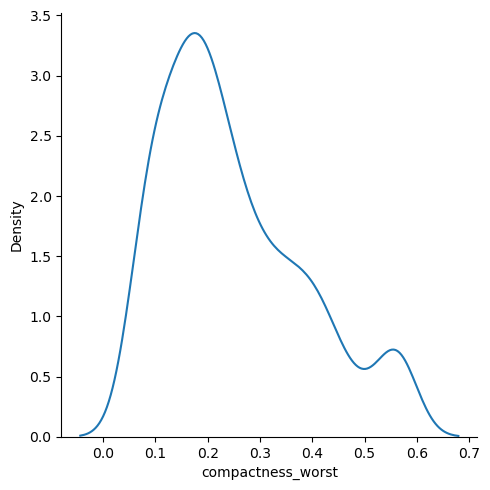

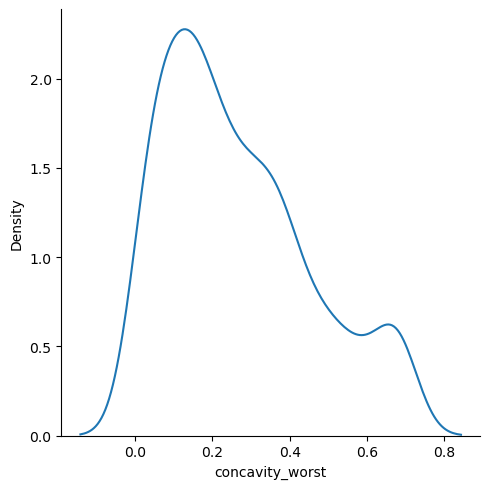

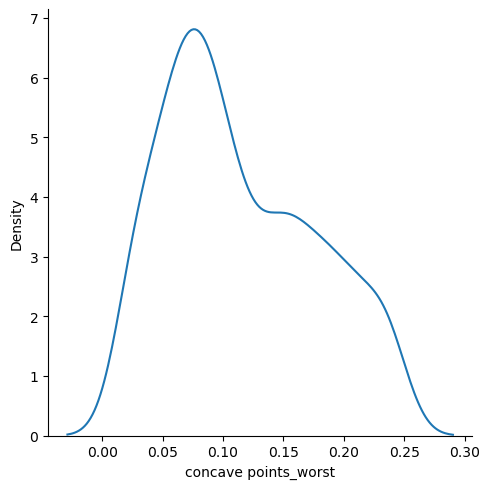

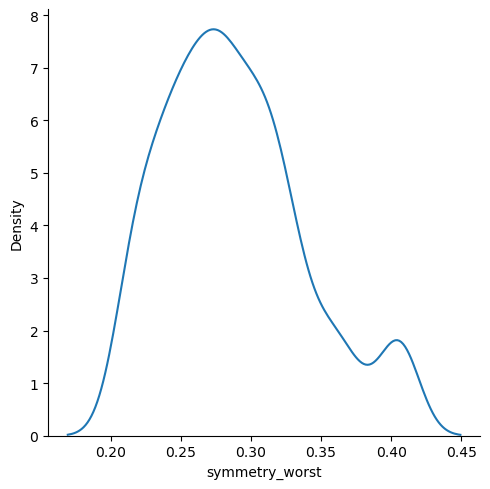

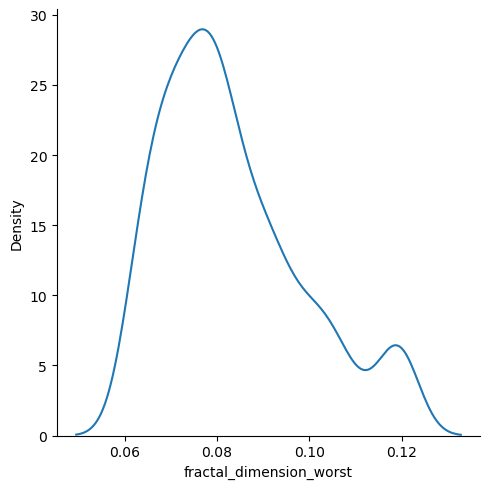

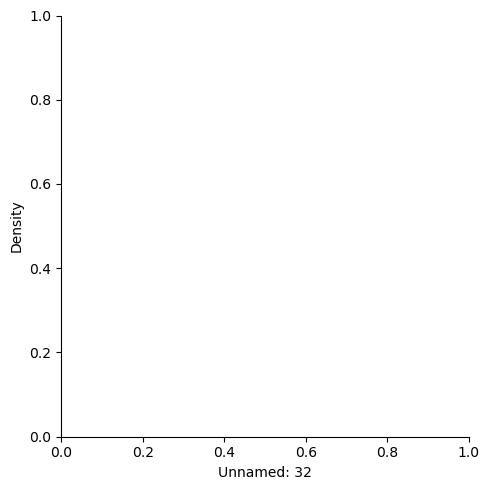

In [7]:
from scipy.stats import mstats, stats

# Winsorize outliers using the 97th and 3rd percentiles (because threshold = 3)
for i in df.select_dtypes(include=[np.number]):
    z_scores = stats.zscore(df[i])
    df[i] = mstats.winsorize(df[i], limits=[0.05, 0.05])

for i in df.select_dtypes(include=[np.number]):
    #display(sns.jointplot(x=i, y=df['Unnamed: 32'], data=df, kind="scatter"))
    sns.displot(data=df, x=i, kind="kde", height = 5)

In [8]:
df2 = df.select_dtypes(include=[np.number])
for col in df2.columns:
    z_scores = np.abs((df2 - df2.mean()) / df2.std()) #z score = (element-mean)/standard deviation

    # Set threshold for identifying outliers
    threshold = 3

    # Identify outliers
    outliers = (z_scores > threshold)|(threshold < -z_scores)
    outlier_list = list(df2[col][outliers[col]]) #

    # Printing the outliers in each column
    print(f"\nThere are {len(outlier_list)} outliers in column '{col}': {outlier_list}")
    #print(df2[col][outliers[col]])


There are 0 outliers in column 'id': []

There are 0 outliers in column 'radius_mean': []

There are 0 outliers in column 'texture_mean': []

There are 0 outliers in column 'perimeter_mean': []

There are 0 outliers in column 'area_mean': []

There are 0 outliers in column 'smoothness_mean': []

There are 0 outliers in column 'compactness_mean': []

There are 0 outliers in column 'concavity_mean': []

There are 0 outliers in column 'concave points_mean': []

There are 0 outliers in column 'symmetry_mean': []

There are 0 outliers in column 'fractal_dimension_mean': []

There are 0 outliers in column 'radius_se': []

There are 0 outliers in column 'texture_se': []

There are 0 outliers in column 'perimeter_se': []

There are 0 outliers in column 'area_se': []

There are 0 outliers in column 'smoothness_se': []

There are 0 outliers in column 'compactness_se': []

There are 0 outliers in column 'concavity_se': []

There are 0 outliers in column 'concave points_se': []

There are 0 outli

C:\Users\Mahdi\anaconda3\Lib\site-packages\pandas\core\internals\managers.py:981: UserWarning: Warning: converting a masked element to nan.
  result[rl] = blk.iget((i, loc))


In [9]:
# Deleting /unwanted variables and checking skew values
del df['Unnamed: 32']
df.drop('id', axis=1)

from scipy.stats import skew

for i in df.select_dtypes(include=np.number):
    print(i)
    print(skew(df[i]))

id
2.007543431709282
radius_mean
0.6424885203306838
texture_mean
0.34668030720402054
perimeter_mean
0.6433768711320093
area_mean
0.9464740413492528
smoothness_mean
0.12930360252459014
compactness_mean
0.7172264371467392
concavity_mean
0.8687874709134165
concave points_mean
0.7925465522566865
symmetry_mean
0.33365204850026997
fractal_dimension_mean
0.6279679439544809
radius_se
1.257445397126181
texture_se
0.6257233799005844
perimeter_se
1.3595779176288543
area_se
1.5062628502039401
smoothness_se
0.8549298364108232
compactness_se
1.0052612798877434
concavity_se
0.8876918767052259
concave points_se
0.5425591501794466
symmetry_se
0.8620720340152564
fractal_dimension_se
1.0127438194100788
radius_worst
0.8033800583974005
texture_worst
0.20518436033799067
perimeter_worst
0.787534338351207
area_worst
1.1194724056178953
smoothness_worst
0.11483322541041636
compactness_worst
0.7863692905236728
concavity_worst
0.685859989125532
concave points_worst
0.4346550408992202
symmetry_worst
0.627346291272

In [10]:
## Handling skewness with Box-Cox transformation

from sklearn.preprocessing import PowerTransformer as pt

for i in df.select_dtypes(include=['float64', 'int64']).columns:
    pt_transformer = pt(method='box-cox')
    df[[i]] = pt_transformer.fit_transform(df[[i]])

id
0.02625775501405622
radius_mean
0.03926745289727676
texture_mean
-0.0020237863453062416
perimeter_mean
0.039493577523031446
area_mean
0.037476384752999546
smoothness_mean
-0.01279490928530156
compactness_mean
-0.0025227887485417253
concavity_mean
-0.08184387183460522
concave points_mean
-0.05627015376199529
symmetry_mean
0.00985523267276398
fractal_dimension_mean
0.06455449826167196
radius_se
0.07217683320830835
texture_se
-0.007763274100011577
perimeter_se
0.06386287520597322
area_se
0.11800980591663551
smoothness_se
0.026463351560959768
compactness_se
0.01852195335233655
concavity_se
-0.052698965194893865
concave points_se
-0.035921278166683855
symmetry_se
0.04849363693386605
fractal_dimension_se
0.033623273094798144
radius_worst
0.07213137190847227
texture_worst
-0.02482103655173856
perimeter_worst
0.07184320637954823
area_worst
0.06667604263450488
smoothness_worst
-0.021504371301568903
compactness_worst
-0.02253178541981181
concavity_worst
-0.11307209742505853
concave points_wor

C:\Users\Mahdi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


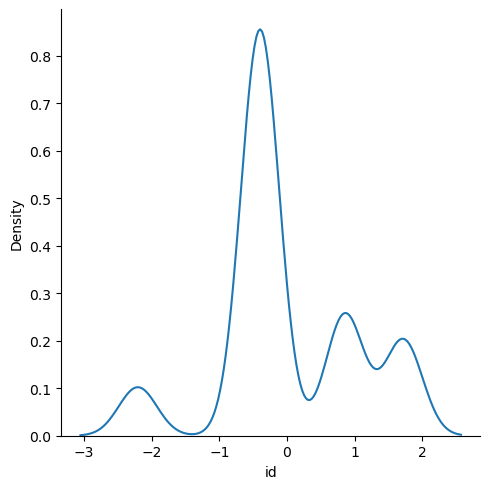

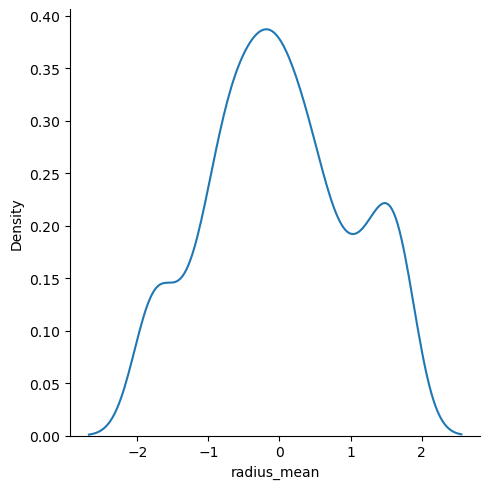

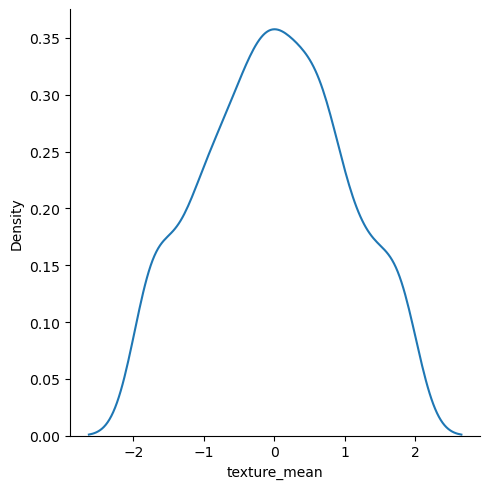

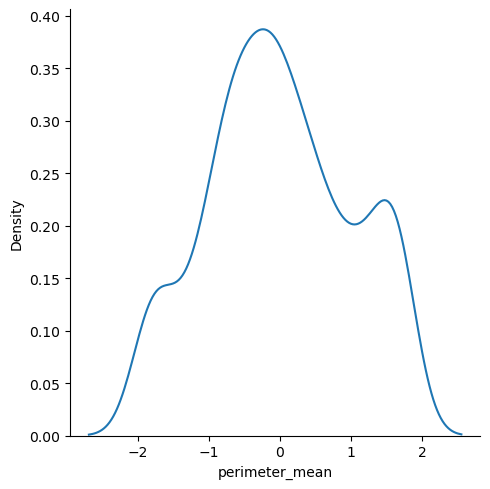

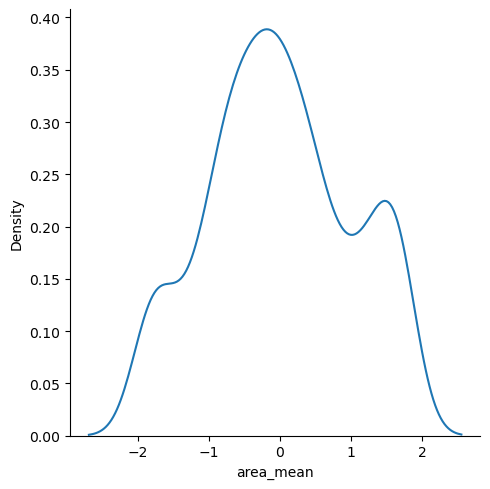

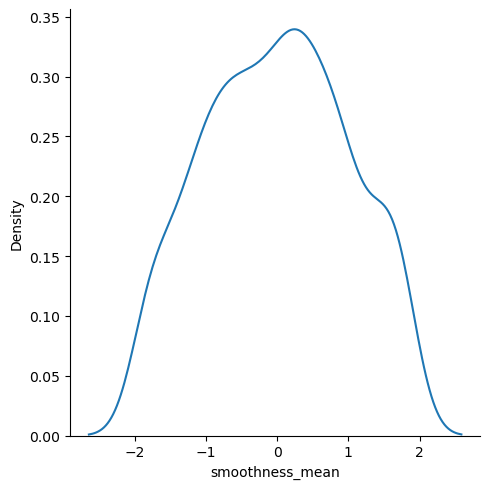

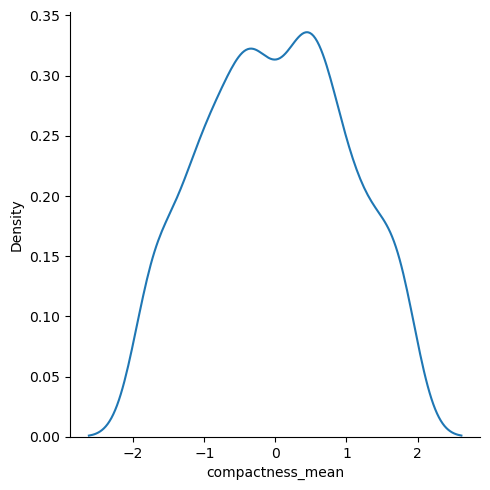

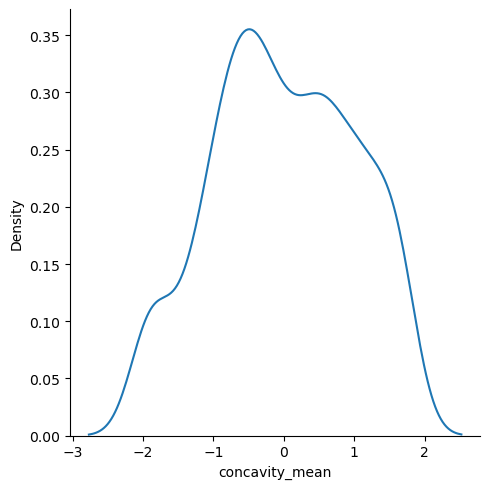

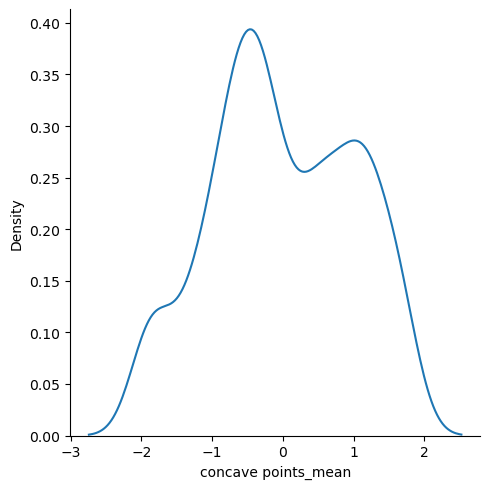

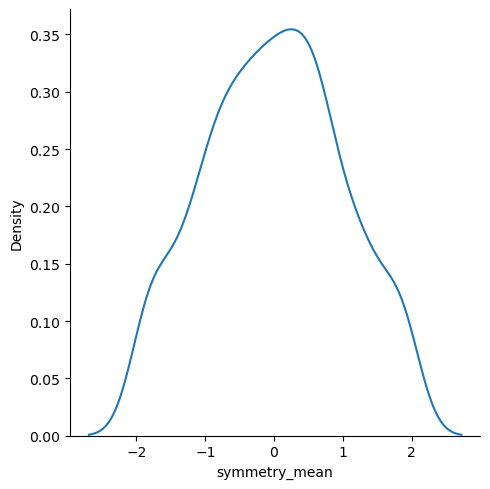

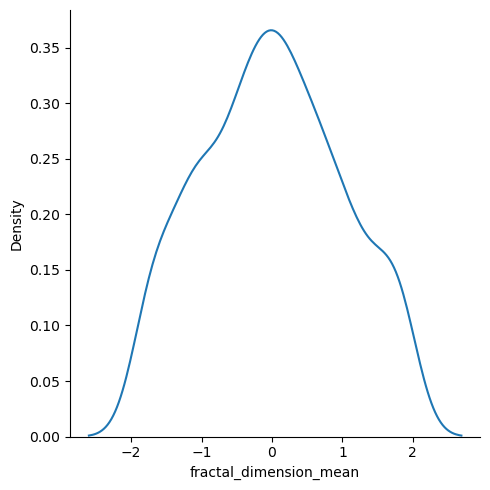

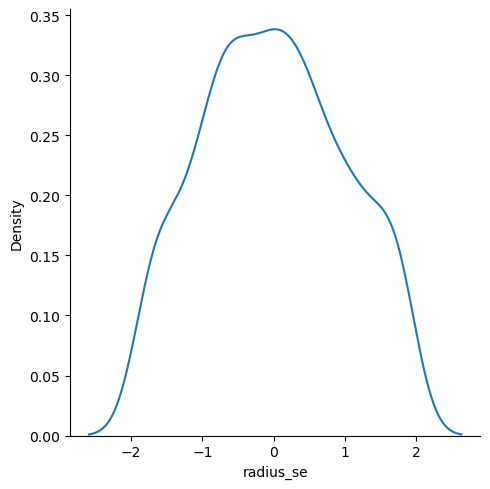

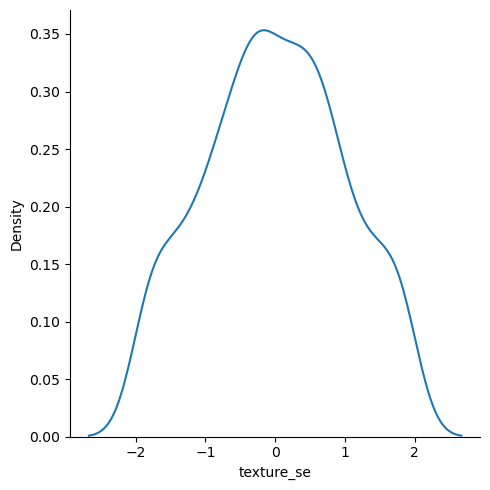

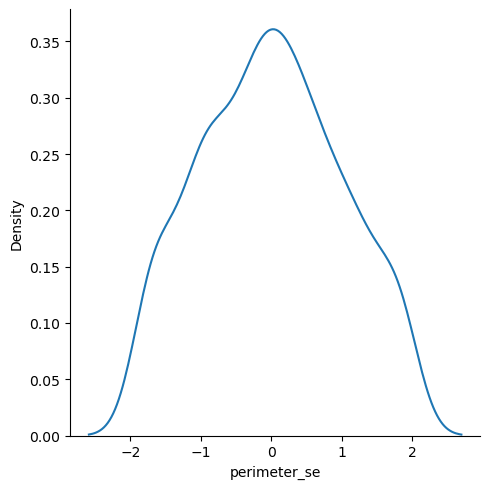

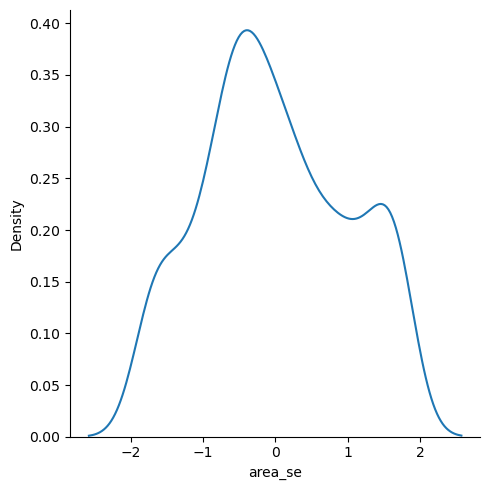

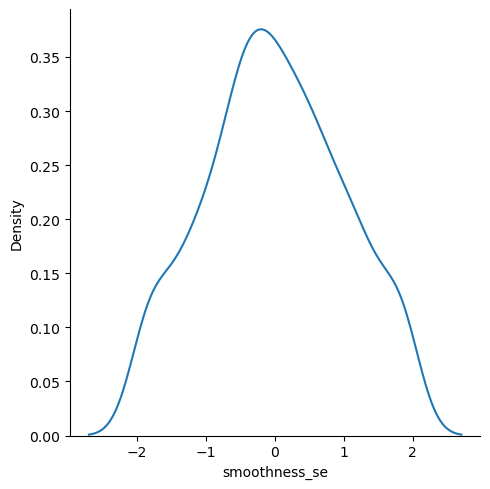

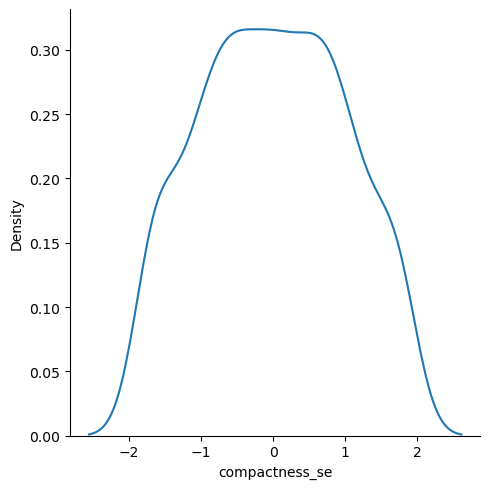

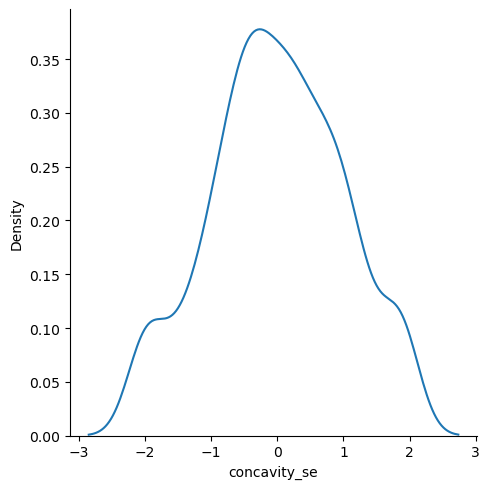

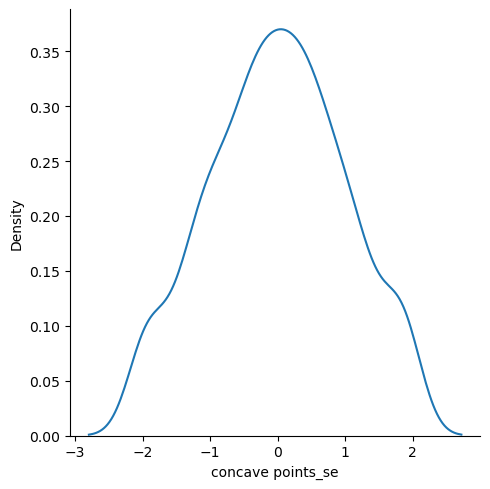

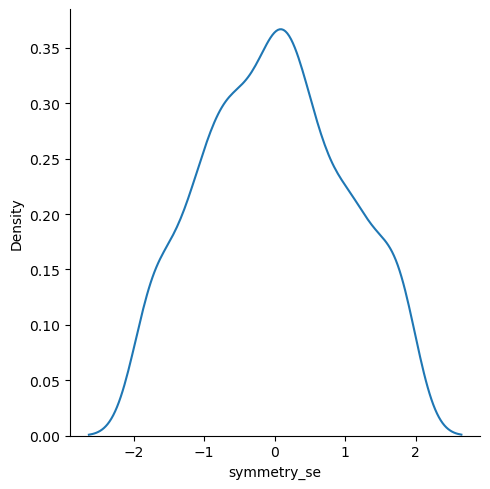

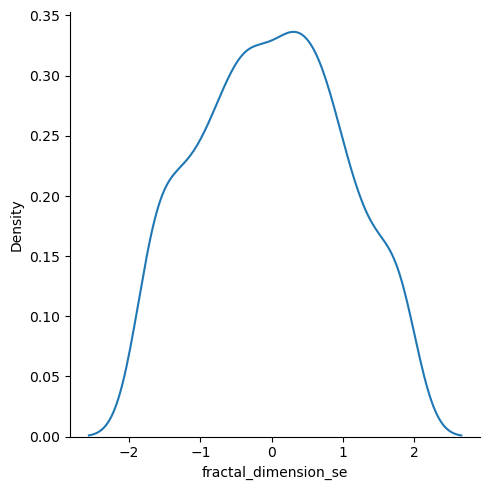

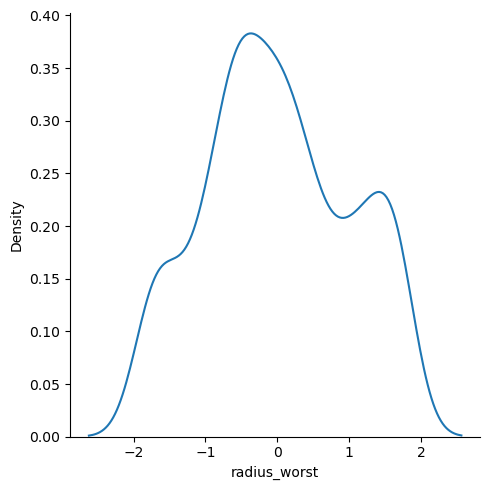

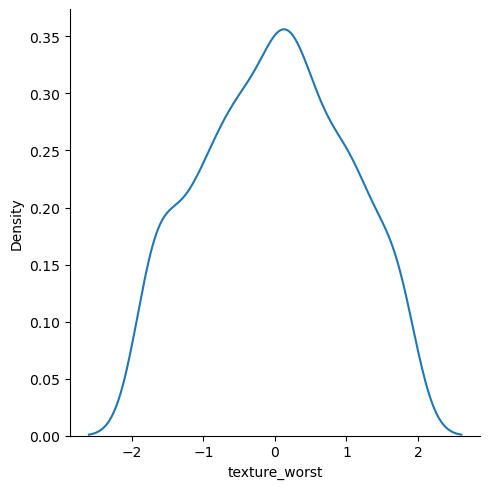

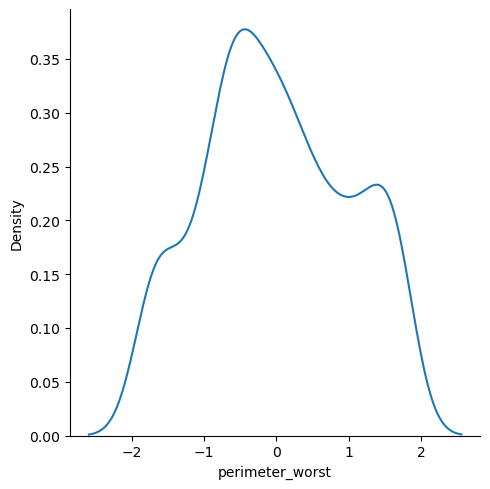

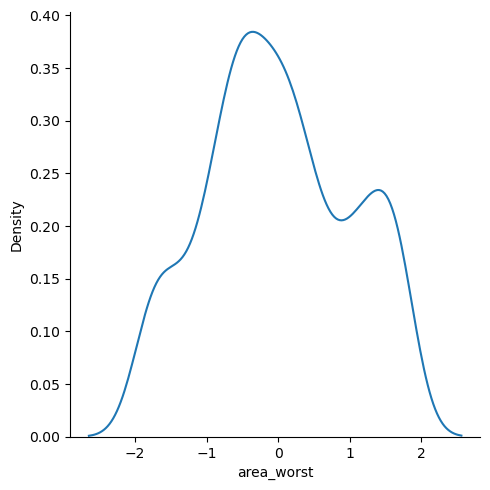

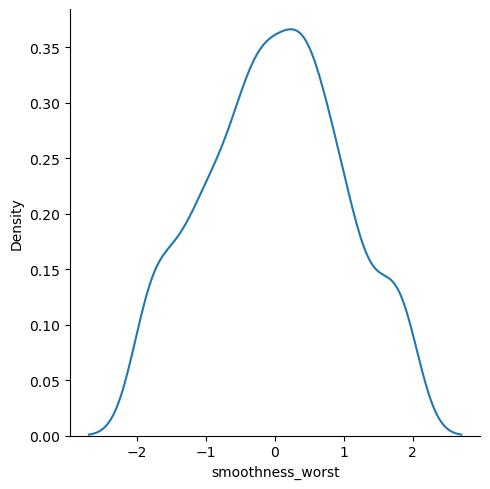

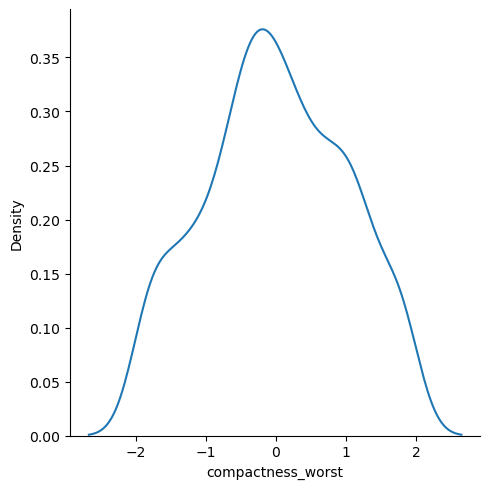

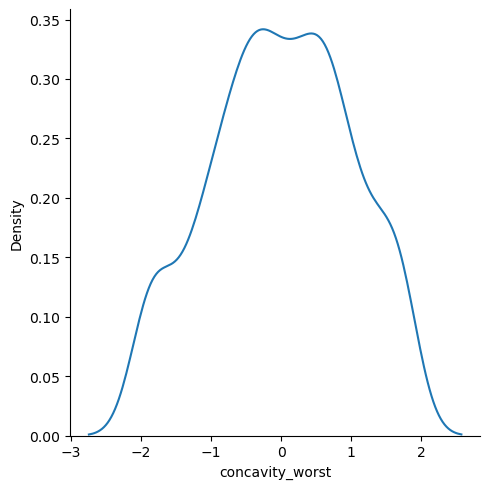

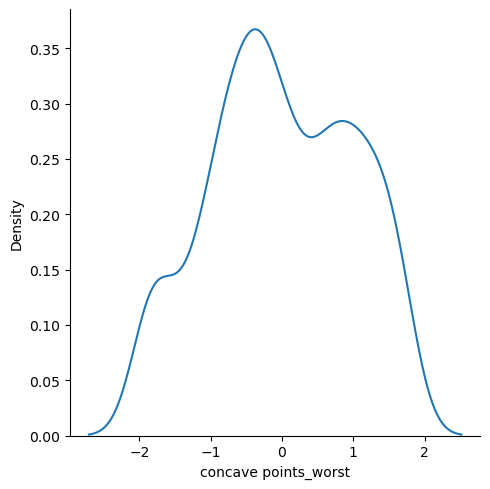

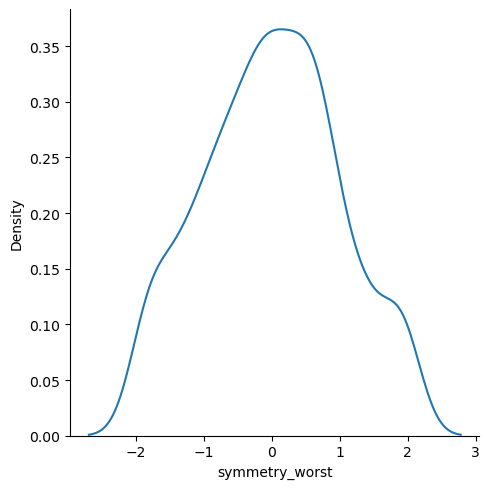

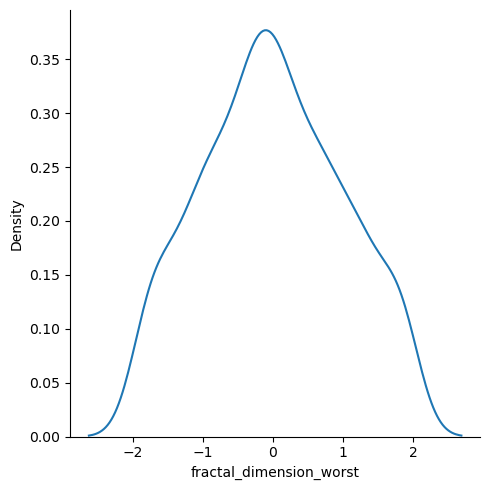

In [11]:
## Checking Skew Values after transformation

from scipy.stats import skew

for i in df.select_dtypes(include=np.number):
    print(i)
    print(skew(df[i]))

for i in df.select_dtypes(include=np.number):
    sns.displot(data=df, x=i, kind="kde", height = 5)

- Outliers were handled by 'capping and flooring'
- The dataset's values transformed using Box-Cox transformation to reduce skewness

#### HANDLING CATEGORICAL DATA

The only categorical variable in the dateset 'diagnosis' consists of only two unique values (m for malignant, b for benign). It will be encoded using label encoding.

In [12]:
# Label encoding

# from sklearn.preprocessing import LabelEncoder
# for i in df.select_dtypes(exclude=np.number):
#         encoder = LabelEncoder()
#         encoded_data = encoder.fit_transform(df[i])
#         df[i] = encoded_data

df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.433218          1     1.217464     -1.787400        1.352383   1.211574   
1 -0.433050          1     1.713393     -0.288532        1.629992   1.709336   
2  1.703830          1     1.556309      0.594159        1.553831   1.555140   
3  1.704005          1    -0.824336      0.387318       -0.551251  -0.912858   
4  1.704042          1     1.664631     -1.339325        1.686013   1.690300   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.706807          1.771644        1.677018             1.681994   
1        -0.906487         -0.355111        0.331298             0.810131   
2         1.078537          1.187600        1.369881             1.681994   
3         1.741533          1.771644        1.661648             1.402035   
4         0.375938          0.782025        1.374165             1.388920   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...      1.686179      -1.566759         1.712602    1.718138   
1  ...      1.645748      -0.318920         1.506893    1.682221   
2  ...      1.487912       0.066422         1.397421    1.498066   
3  ...     -0.075199       0.235887        -0.029092   -0.461771   
4  ...      1.361732      -1.718316         1.392004    1.381567   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.422997           1.801952         1.732310              1.672113   
1         -0.362223          -0.267679         0.102389              1.116069   
2          0.622436           1.236775         0.994618              1.672113   
3          1.863822           1.801952         1.732310              1.672113   
4          0.295447          -0.104454         0.806616              0.833596   

   symmetry_worst  fractal_dimension_worst  
0        1.934385                 1.819900  
1       -0.132150                 0.569345  
2        1.367492                 0.483514  
3        1.934385                 1.846477  
4       -1.092297                -0.281731  

[5 rows x 32 columns]

<Axes: xlabel='diagnosis', ylabel='count'>

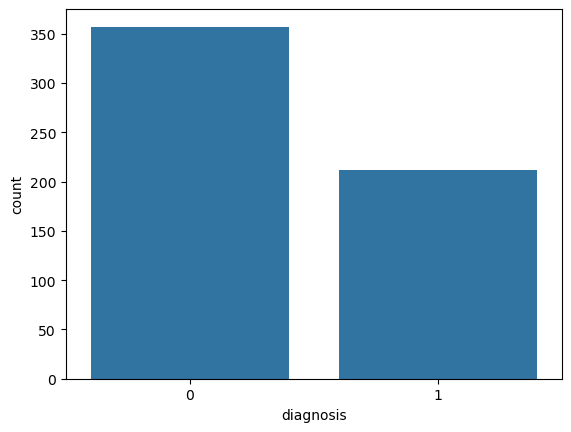

In [13]:
sns.countplot(data=df, x = 'diagnosis')

#### CORRELATION ANALYSIS USING A HEATMAP

<Axes: >

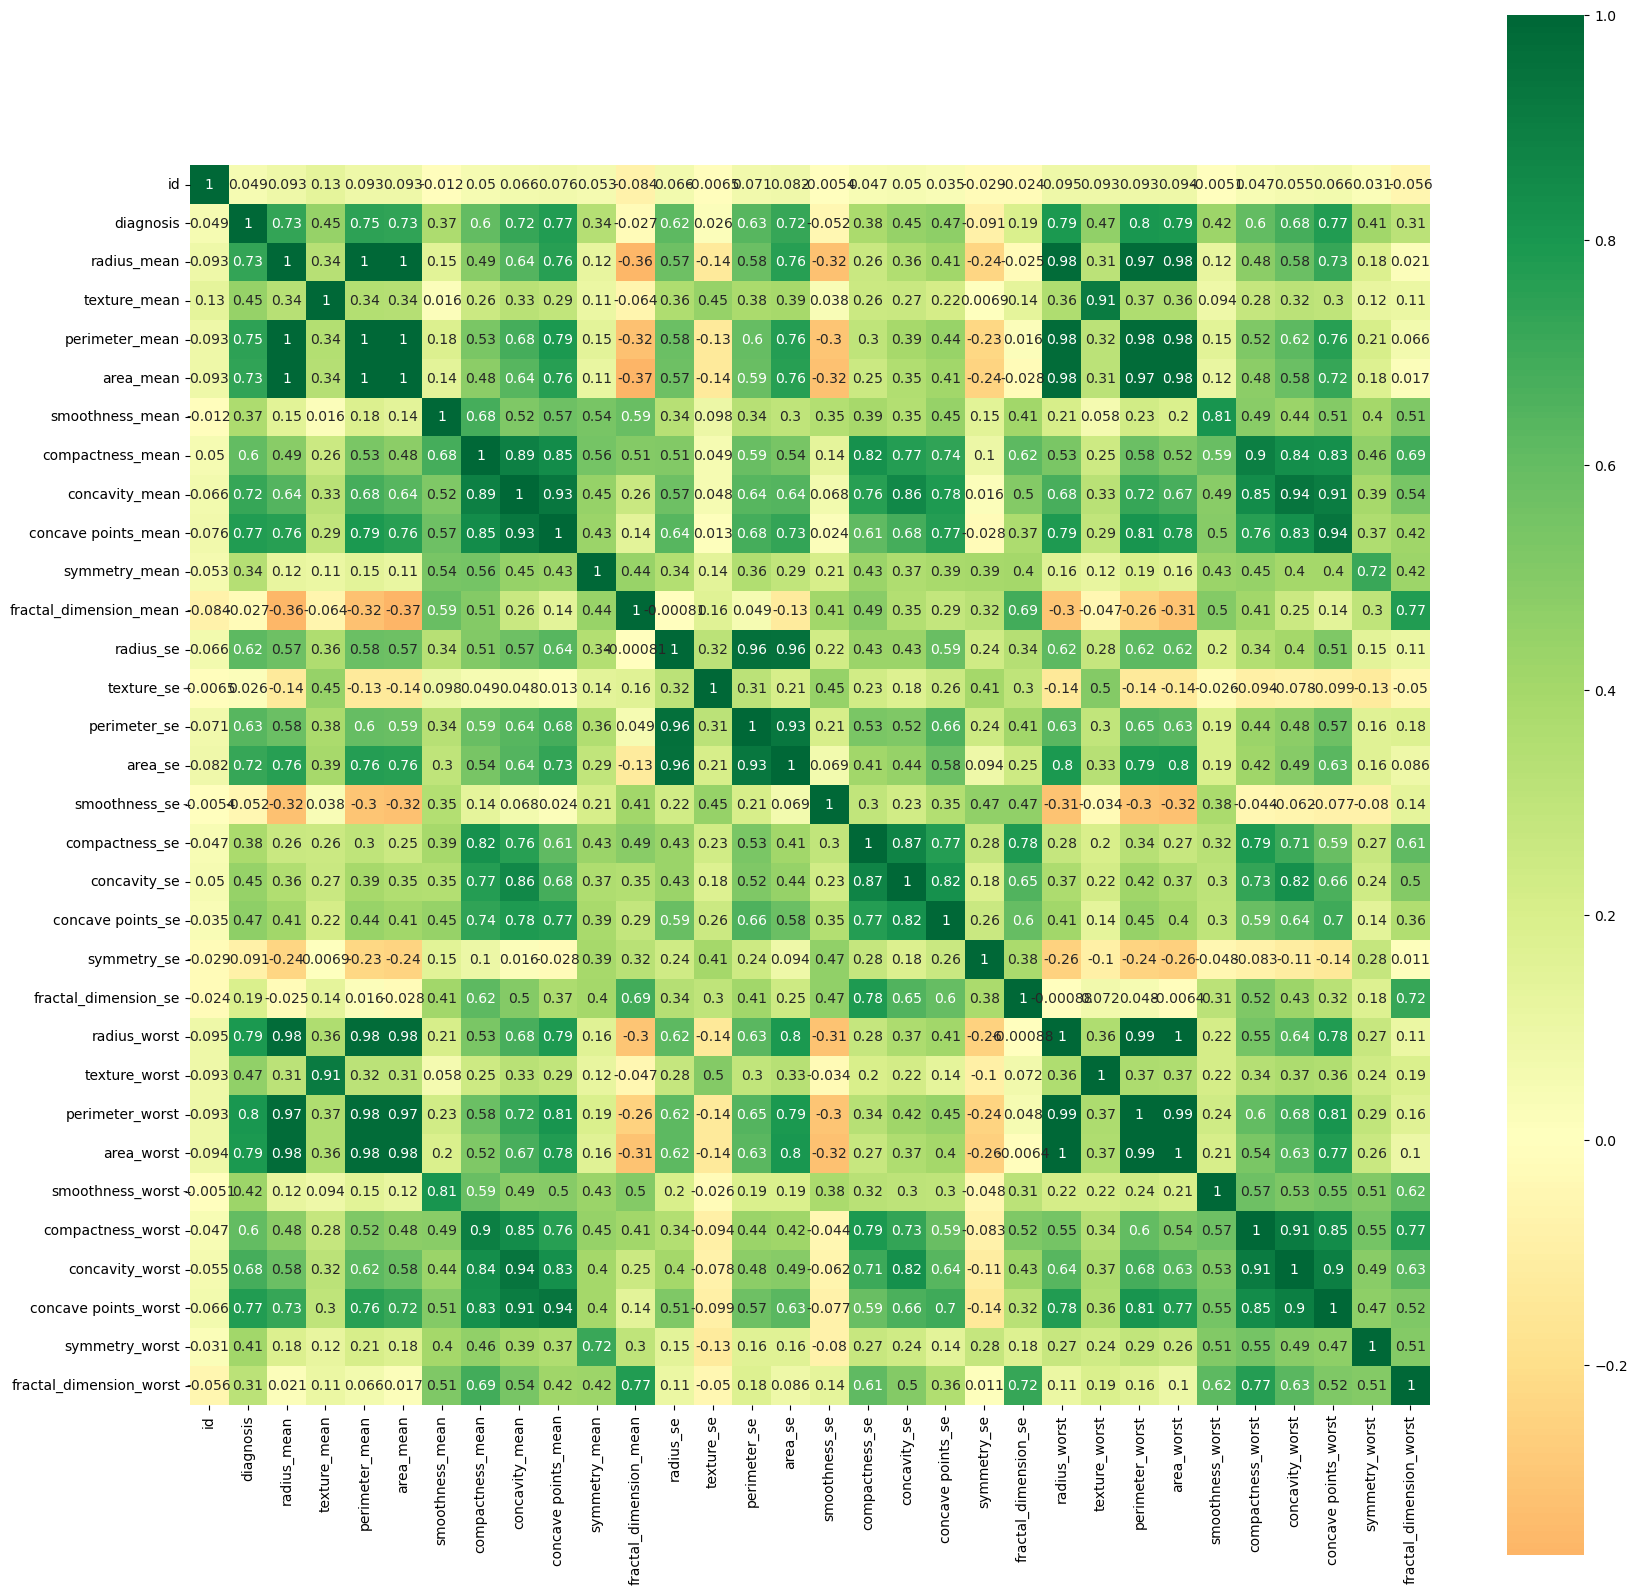

In [14]:
## Plotting heatmap

import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

- Heatmap revealed multicollinearity between variables, the best ones of the variables were picked for classification while the rest were dropped

In [15]:
#dropping columns radius and perimeter colomns, and also all other worst and se values
df.drop(['radius_se','perimeter_se','radius_worst','perimeter_worst',
         'radius_mean', 'perimeter_mean', 'area_worst', 'area_se', 'smoothness_worst', 
         'smoothness_se', 'concavity_worst', 'concavity_se', 'compactness_worst', 'compactness_se', 
         'fractal_dimension_worst', 'fractal_dimension_se', 'concave points_worst', 'concave points_se', 
         'symmetry_worst', 'symmetry_se', 'concavity_mean','concave points_mean'],axis=1,inplace=True)

<Axes: >

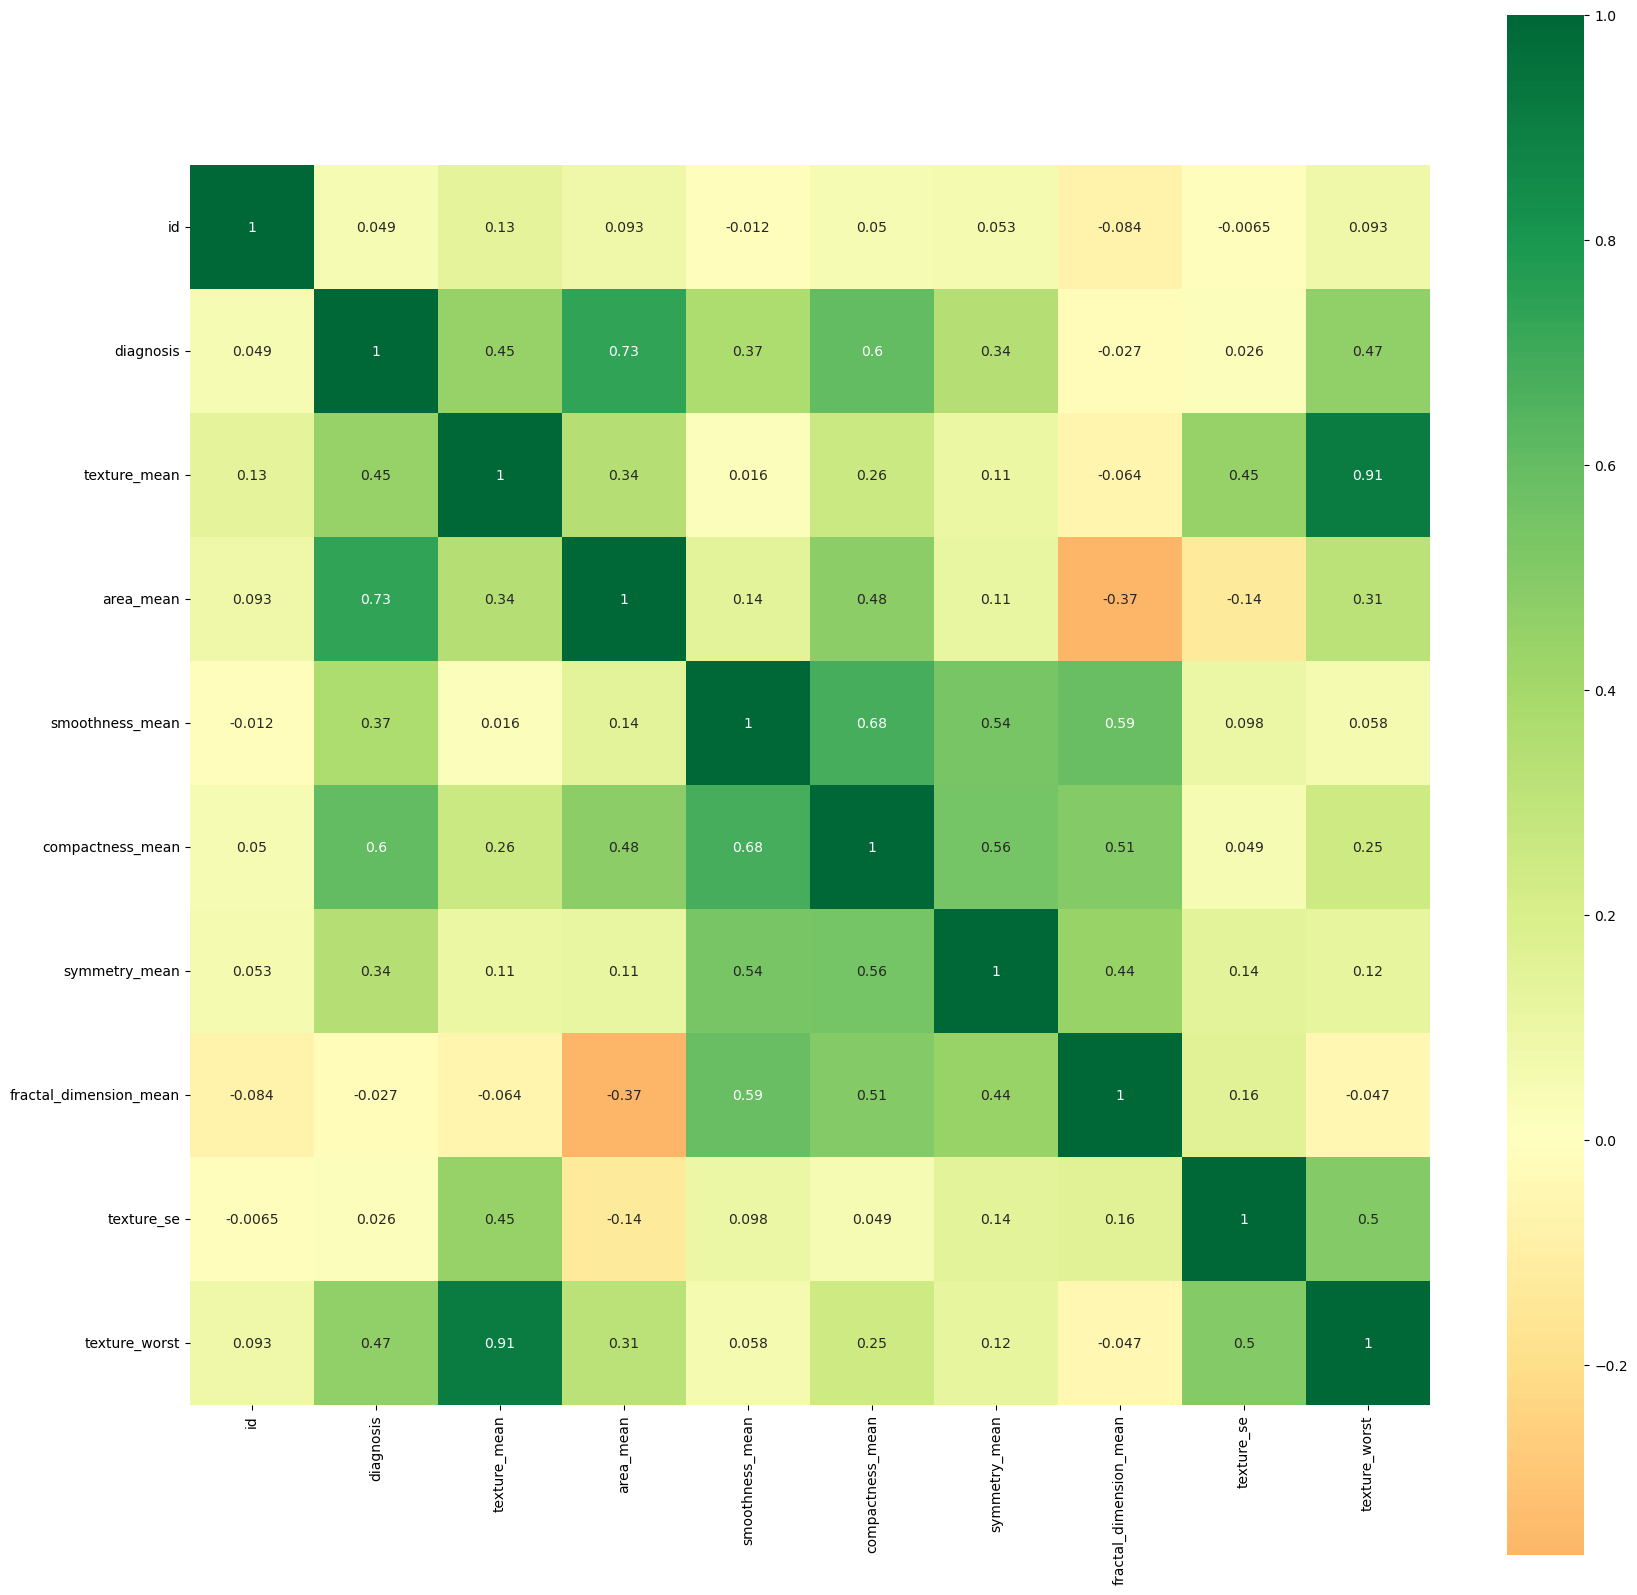

In [16]:
## Plotting heatmap after resolving multicollinearity

import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

### CLASSIFIER PREDICTION

In [17]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [18]:
### Scaling the predictor variables
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
X = pd.DataFrame(standardized_data, columns=X.columns)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [20]:
# Using Logistics regression

from sklearn.linear_model import LogisticRegression
# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Making predictions on the test data
y_pred_trainLR = model.predict(X_train)
y_pred_testLR = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred_testLR)
accuracy2 = accuracy_score(y_train, y_pred_trainLR)

print("Train Accuracy:", accuracy2)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred_testLR))

Train Accuracy: 0.9582417582417583
Test Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [23]:
from sklearn.model_selection import cross_val_score, KFold
#Perform 10 fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
lr_val_score = cross_val_score(model, X, y, cv=cv)

In [24]:
#Print the average cross-validation score in percentage
print(f"Average cross-validation score for Logistic Regression is {np.mean(lr_val_score)*100}")

Average cross-validation score for Logistic Regression is 96.13408521303256


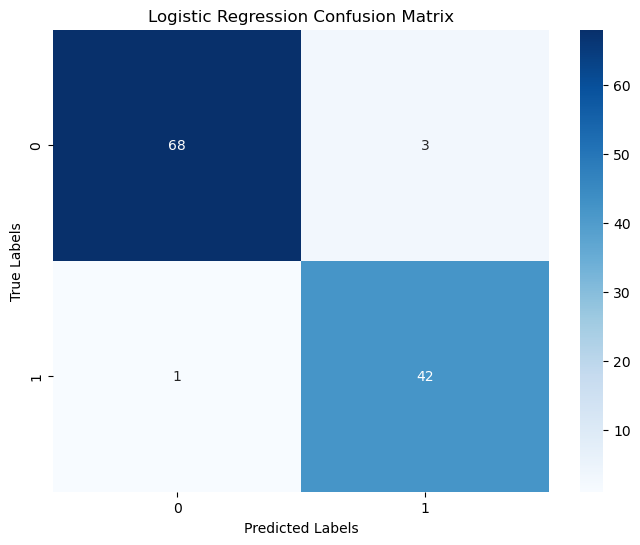

In [25]:
# Plot Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_testLR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix")

plt.show()

- High Accuracy
- Excellent precision, recall, and F1-scores.
- High cross-validation performance.

#### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

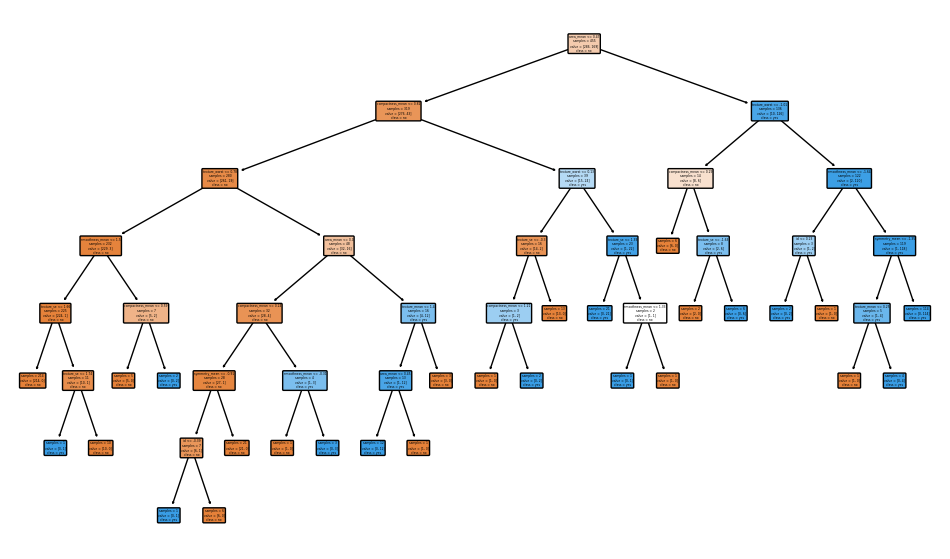

In [27]:
#Plot Decision Tree

fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(dtc, 
                   feature_names=X_train.columns,  
                   class_names=["no","yes"],
                   filled=True,
                   rounded=True,
                   impurity=False,
                   proportion=False,
                   precision=2)

In [28]:
# Make predictions on the test set
y_dt_pred = dtc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_dt_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_dt_pred))

Accuracy: 0.9210526315789473
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [29]:
from sklearn.model_selection import cross_val_score, KFold
#Perform 10 fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
rf_val_score = cross_val_score(dtc, X, y, cv=cv)

In [30]:
#Print the average cross-validation score in percentage
print(f"Average cross-validation score for Decision Tree Classifier is {np.mean(rf_val_score)*100}")

Average cross-validation score for Decision Tree Classifier is 94.02882205513784


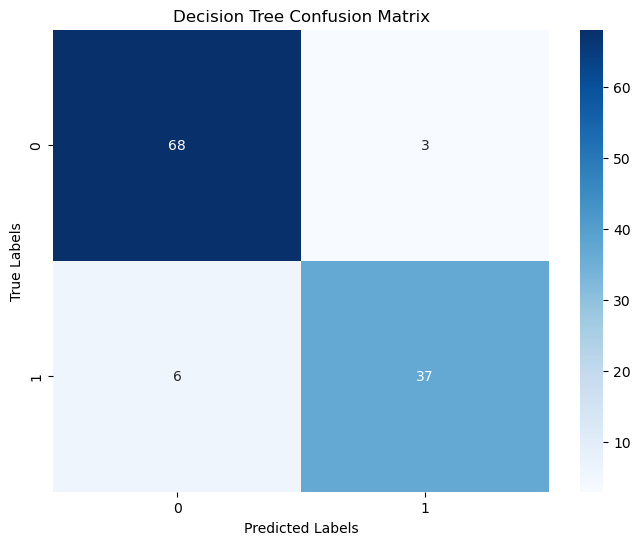

In [31]:
# Plot Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix")

plt.show()

- Lower but still high accuracy
- Balanced precision and recall, with decent F1-scores
- High cross-validation performance.

#### Random Forest Classifier

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)

# Train the random forest classifier
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_train_rf = random_forest.predict(X_train)
y_pred_rf = random_forest.predict(X_test)

from sklearn.metrics import accuracy_score
#Calculate and print the accuracy score
print(f"Rf training model accuracy is {accuracy_score(y_train, y_train_rf)}")
print(f"Rf testing model accuracy is {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

Rf training model accuracy is 1.0
Rf testing model accuracy is 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [34]:
from sklearn.model_selection import cross_val_score, KFold

#Perform 10 fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
rf_val_score = cross_val_score(random_forest, X, y, cv=cv)

In [35]:
#Print the average cross-validation score in percentage
print(f"Average cross-validation score for Random Forest Classifier is {np.mean(rf_val_score)*100}")

Average cross-validation score for Random Forest Classifier is 95.42293233082708


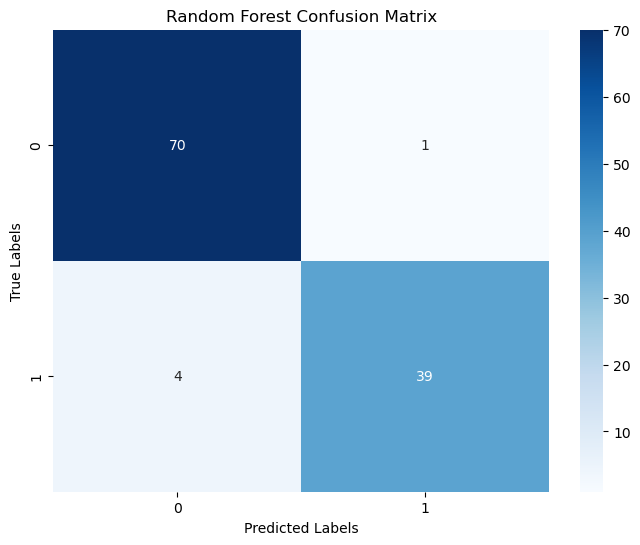

In [36]:
# Plot Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")

plt.show()

- High accuracy.
- High precision, recall, and F1-scores.
- High cross-validation performance.
- Perfect training accuracy and lower but still good test accuracy indicates potential overfitting

#### FINALLY:
- Logistics regression was carried out on the dataset to predict 'diagnosis'
- Decision tree regression was carried out
- Random forests classification was also carried out.
  
Based on all the results, the Logistic Regression Model demonstrates the best overall performance:
- As it has the highest 10-fold cross-validation average (96.13%), indicating strong generalization performance.
- It maintains high precision, recall, and F1-scores across both classes.
- It shows consistent performance across both 5-fold and 10-fold cross-validation, suggesting robustness and reliability.

### MODEL BUILDING

In [37]:
# def predict_cancer(model, details):
# '''Assuming 'details' is a numpy array with the tumor features in the form:
#        details = np.array([ 'texture_mean', 'area_mean', 'smoothness_mean', 
#         'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 
#         'texture_worst'])'''
#     threshold = 0.5
#     details = details.reshape(1, -1)
#     prob = model.predict(details)[0]
#     if prob > threshold:
#         print("Malignant!")
#     else:
#         print("Benign!")

# def predict_cancer(model, features):
#   # Assuming 'features' is a numpy array with the tumor features
#   prob = model.predict_proba(features.reshape(1, -1))[:, 1]  # Probability of being malignant
#   if prob > 0.5:
#     return "Malignant"
#   else:
#     return "Benign"

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   area_mean               569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   texture_se              569 non-null    float64
 8   texture_worst           569 non-null    float64
dtypes: float64(9)
memory usage: 40.1 KB


In [39]:
##SAMPLE IMPLEMENTATION

# id = float(input("ID: "))
# texture_mean = float(input("texture_mean: "))
# area_mean = float(input("area_mean: "))
# smoothness_mean = float(input("smoothness_mean: "))
# compactness_mean = float(input("compactness_mean: "))
# symmetry_mean = float(input("symmetry_mean: "))
# fractal_dimension_mean = float(input("fractal_dimension_mean: "))
# texture_se = float(input("texture_se: "))
# texture_worst = float(input("texture_worst: "))

# features = [id,
# texture_mean,
# area_mean,
# smoothness_mean,
# compactness_mean,
# symmetry_mean,
# fractal_dimension_mean,
# texture_se,
# texture_worst]

# features1 = np.array(features)

features1 = np.array([81182, 11.23, 700, 0.08, 0.15, 0.18, 0.05, 1, 27])

def predict_cancer(model, features):
  # Assuming 'features' is a numpy array with the tumor features
  prob = model.predict_proba(features.reshape(1, -1))[:, 1]  # Probability of being malignant
  if prob > 0.5:
    return "Malignant"
  else:
    return "Benign"

print(predict_cancer(model, features1))

Benign


C:\Users\Mahdi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
